# <h1><center>Final Project</center></h1>

**Hailey Robinson**

**K-State Honor Code:"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work" **

# 1. Business Understanding

### Summary of Business Problem: 

* Movie producers need to know the key elements of creating a successful movie
* The goal of this analysis is to determine the factors that affect imdb scores, which can also affect the success of a movie
* What are the factors that make one movie better than another in terms of imdb score? 
* This can help film companies produce extremely successful movies that will get high imdb scores


### What are the project's goals? 

* Determine what factors are highly correlated with imdb score 
* Help guide film companies in producing sucessful movies 
* Clean the data so it is accurate and easy to manipulate
* Provide visualization of results so they are easy to understand and clear

### If you're hired as a data/business analyst to predict how well a movie will perform in theaters, what kind of data would you collect? 

There are all kinds of data that you would collect, including: 
* Public ratings and reviews
* Duration
* Director
* Actors/Actresses Star Power and acting expertise
* Genre of movie
* Language of movie
* Country produced in 
* Gross Earnings of movie 
* Budget of Movie
* Audience the movie is directed towards (eg. family, childrens, adult) 

### What variables are highly correlated to imdb score? In this project, you will use imdb_score to measure a movie's success

#### Import Packages

In [517]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

#### Read Data

In [518]:
data=pd.read_csv("movie_metadata.csv_movie_metadata.csv")

#### View Missing Variables

In [519]:
data.isnull().sum()

color                        19 
director_name                104
num_critic_for_reviews       50 
duration                     15 
director_facebook_likes      104
actor_3_facebook_likes       23 
actor_2_name                 13 
actor_1_facebook_likes       7  
gross                        884
genres                       0  
actor_1_name                 7  
movie_title                  0  
num_voted_users              0  
cast_total_facebook_likes    0  
actor_3_name                 23 
facenumber_in_poster         13 
plot_keywords                153
movie_imdb_link              0  
num_user_for_reviews         21 
language                     12 
country                      5  
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes       13 
imdb_score                   0  
aspect_ratio                 329
movie_facebook_likes         0  
dtype: int64

#### Drop Null Variables for Quick Correlation (see mot detailed correlation later in notebook)

In [520]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
color                        3756 non-null object
director_name                3756 non-null object
num_critic_for_reviews       3756 non-null float64
duration                     3756 non-null float64
director_facebook_likes      3756 non-null float64
actor_3_facebook_likes       3756 non-null float64
actor_2_name                 3756 non-null object
actor_1_facebook_likes       3756 non-null float64
gross                        3756 non-null float64
genres                       3756 non-null object
actor_1_name                 3756 non-null object
movie_title                  3756 non-null object
num_voted_users              3756 non-null int64
cast_total_facebook_likes    3756 non-null int64
actor_3_name                 3756 non-null object
facenumber_in_poster         3756 non-null float64
plot_keywords                3756 non-null object
movie_imdb_link              3756 non-

#### Correlation Analysis

In [521]:
corr = pd.DataFrame(data.corr()['imdb_score'].drop('imdb_score'))
corr.sort_values(['imdb_score'], ascending = False)

,imdb_score
num_voted_users,0.482430
duration,0.366221
num_critic_for_reviews,0.347886
num_user_for_reviews,0.325003
movie_facebook_likes,0.281155
gross,0.214740
director_facebook_likes,0.192314
cast_total_facebook_likes,0.106803
actor_2_facebook_likes,0.102372
actor_1_facebook_likes,0.093597


#### High Correlation

Without doing any other data cleaning/preparation first, you can see that the following are highly correclated with imdb score: 
* Number of users who voted
* Duration 
* Number critical review on imdb
* Number of users who left reviews

Later in the analysis we will look further into correlation and which factors are strongly correlated to imdb scores. 

# 2. Data Understanding

#### Starting with a fresh dataset: 

In [522]:
df=pd.read_csv("movie_metadata.csv_movie_metadata.csv")

#### View Data Types and Data Amounts

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

* We have a variety of data types and many missing values 

In [524]:
df.isnull().sum()

color                        19 
director_name                104
num_critic_for_reviews       50 
duration                     15 
director_facebook_likes      104
actor_3_facebook_likes       23 
actor_2_name                 13 
actor_1_facebook_likes       7  
gross                        884
genres                       0  
actor_1_name                 7  
movie_title                  0  
num_voted_users              0  
cast_total_facebook_likes    0  
actor_3_name                 23 
facenumber_in_poster         13 
plot_keywords                153
movie_imdb_link              0  
num_user_for_reviews         21 
language                     12 
country                      5  
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes       13 
imdb_score                   0  
aspect_ratio                 329
movie_facebook_likes         0  
dtype: int64

* Here we can see how many values we are missing for each column. The data is missing a lot of information especially in gross earnings and budget categories

#### Basic Statistics

In [525]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


* Here we can see basic statistics that give a good summary of our data and what is included

#### Identify value counts of a selective list of columns considered to be important to predict a movie's success (imdb_score)

In [526]:
print df['gross'].value_counts().head(5)
print df['gross'].count()

218051260.0    3
3000000.0      3
34964818.0     3
5773519.0      3
47000000.0     3
Name: gross, dtype: int64
4159


In [527]:
print df['budget'].value_counts().head(5)
print df['budget'].count()

20000000.0    174
15000000.0    143
25000000.0    142
30000000.0    141
10000000.0    135
Name: budget, dtype: int64
4551


In [528]:
print df['num_voted_users'].value_counts().head(5)
print df['num_voted_users'].count()

57      5
6       4
6025    3
374     3
53      3
Name: num_voted_users, dtype: int64
5043


In [529]:
print df['num_critic_for_reviews'].value_counts().head(5)
print df['num_critic_for_reviews'].count()

1.0     43
9.0     37
5.0     36
10.0    35
8.0     35
Name: num_critic_for_reviews, dtype: int64
4993


In [530]:
print df['duration'].value_counts().head(5)
print df['duration'].count()

90.0     161
100.0    141
101.0    139
98.0     135
97.0     131
Name: duration, dtype: int64
5028


# 3. Data Preparation

### Handling Missing Values

#### Drop Duplicates

In [531]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

#### Check for Missing Values

In [532]:
df.isnull().sum()

color                        19 
director_name                104
num_critic_for_reviews       50 
duration                     15 
director_facebook_likes      104
actor_3_facebook_likes       23 
actor_2_name                 13 
actor_1_facebook_likes       7  
gross                        884
genres                       0  
actor_1_name                 7  
movie_title                  0  
num_voted_users              0  
cast_total_facebook_likes    0  
actor_3_name                 23 
facenumber_in_poster         13 
plot_keywords                153
movie_imdb_link              0  
num_user_for_reviews         21 
language                     12 
country                      5  
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes       13 
imdb_score                   0  
aspect_ratio                 329
movie_facebook_likes         0  
dtype: int64

This is a lot of missing values, lets look to see if we can remove unnecessary columns before we drop all null values

#### Is Color an Important Variable?

In [533]:
df.groupby('color').size()

color
 Black and White    209 
Color               4815
dtype: int64

Majority of the movies are color, we can remove this column because it isn't significant

In [534]:
df = df.drop('color', axis=1)
df.head(2)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


#### Is Language Important? 

In [535]:
df.groupby('language').size()

language
Aboriginal    2   
Arabic        5   
Aramaic       1   
Bosnian       1   
Cantonese     11  
Chinese       3   
Czech         1   
Danish        5   
Dari          2   
Dutch         4   
Dzongkha      1   
English       4704
Filipino      1   
French        73  
German        19  
Greek         1   
Hebrew        5   
Hindi         28  
Hungarian     1   
Icelandic     2   
Indonesian    2   
Italian       11  
Japanese      18  
Kannada       1   
Kazakh        1   
Korean        8   
Mandarin      26  
Maya          1   
Mongolian     1   
None          2   
Norwegian     4   
Panjabi       1   
Persian       4   
Polish        4   
Portuguese    8   
Romanian      2   
Russian       11  
Slovenian     1   
Spanish       40  
Swahili       1   
Swedish       5   
Tamil         1   
Telugu        1   
Thai          3   
Urdu          1   
Vietnamese    1   
Zulu          2   
dtype: int64

Majority of movies are in English, we can remove this variable as well

In [536]:
df = df.drop('language', axis=1)
df.head(2)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


#### What about country?

In [537]:
df.groupby('country').size()

country
Afghanistan             1   
Argentina               4   
Aruba                   1   
Australia               55  
Bahamas                 1   
Belgium                 4   
Brazil                  8   
Bulgaria                1   
Cambodia                1   
Cameroon                1   
Canada                  126 
Chile                   1   
China                   30  
Colombia                1   
Czech Republic          3   
Denmark                 11  
Dominican Republic      1   
Egypt                   1   
Finland                 1   
France                  154 
Georgia                 1   
Germany                 97  
Greece                  2   
Hong Kong               17  
Hungary                 2   
Iceland                 3   
India                   34  
Indonesia               1   
Iran                    4   
Ireland                 12  
                        ..  
Libya                   1   
Mexico                  17  
Netherlands             5   
New Li

In [538]:
df = df.drop('country', axis=1)
df.head(2)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


#### Let's Look at Genres

In [539]:
df.groupby('genres').size()

genres
Action                                                             11
Action|Adventure                                                   11
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy             1 
Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller    1 
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi              2 
Action|Adventure|Animation|Comedy|Family                           6 
Action|Adventure|Animation|Comedy|Family|Fantasy                   4 
Action|Adventure|Animation|Comedy|Family|Fantasy|Sci-Fi            2 
Action|Adventure|Animation|Comedy|Family|Sci-Fi                    3 
Action|Adventure|Animation|Comedy|Fantasy                          1 
Action|Adventure|Animation|Comedy|Fantasy|Sci-Fi                   1 
Action|Adventure|Animation|Comedy|Sci-Fi                           1 
Action|Adventure|Animation|Drama|Fantasy|Sci-Fi                    1 
Action|Adventure|Animation|Drama|Mystery|Sci-Fi|Thriller           1 
Action|Advent

Since there are so many different categories for genres, we will remove the variable. It would be extremely difficult to relate movies with multiple genres back to the imdb score.

In [540]:
df = df.drop('genres', axis=1)
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


#### Drop Other Unnecessary Values

In [541]:
df = df.drop('actor_2_name', axis=1)
df = df.drop('actor_1_name', axis=1)
df = df.drop('actor_3_name', axis=1)
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,1000.0,760505847.0,Avatar,886204,4834,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,40000.0,309404152.0,Pirates of the Caribbean: At World's End,471220,48350,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,11000.0,200074175.0,Spectre,275868,11700,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,The Dark Knight Rises,1144337,106759,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,131.0,NaN,Star Wars: Episode VII - The Force Awakens,8,143,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


I am not interested in specific actor names in this analysis, so we will remove them from analysis since they have some missing values

#### Now Look at Missing Values Again

In [542]:
df.isnull().sum()

director_name                104
num_critic_for_reviews       50 
duration                     15 
director_facebook_likes      104
actor_3_facebook_likes       23 
actor_1_facebook_likes       7  
gross                        884
movie_title                  0  
num_voted_users              0  
cast_total_facebook_likes    0  
facenumber_in_poster         13 
plot_keywords                153
movie_imdb_link              0  
num_user_for_reviews         21 
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes       13 
imdb_score                   0  
aspect_ratio                 329
movie_facebook_likes         0  
dtype: int64

There are now fewer missing variables. Becasue I want to have the most accurate data, I am not going to replace any values using the mean. Instead, I will just drop all rows with missing values to ensure we have the most complete dataset to make accurate predictions about successful  movies. 

#### Drop Missing Variables 

In [543]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3758 entries, 0 to 5042
Data columns (total 21 columns):
director_name                3758 non-null object
num_critic_for_reviews       3758 non-null float64
duration                     3758 non-null float64
director_facebook_likes      3758 non-null float64
actor_3_facebook_likes       3758 non-null float64
actor_1_facebook_likes       3758 non-null float64
gross                        3758 non-null float64
movie_title                  3758 non-null object
num_voted_users              3758 non-null int64
cast_total_facebook_likes    3758 non-null int64
facenumber_in_poster         3758 non-null float64
plot_keywords                3758 non-null object
movie_imdb_link              3758 non-null object
num_user_for_reviews         3758 non-null float64
content_rating               3758 non-null object
budget                       3758 non-null float64
title_year                   3758 non-null float64
actor_2_facebook_likes       3758 n

* We are left with 3758 variables which is still a good amount of data
* I believe that these zeros could be true values for the categories, so I will leave the 0's in the data

### Sort Content Ratings

#### How many values in each category? 

In [544]:
df.groupby('content_rating').size()

content_rating
Approved     17  
G            87  
GP           1   
M            2   
NC-17        6   
Not Rated    34  
PG           566 
PG-13        1309
Passed       3   
R            1701
Unrated      22  
X            10  
dtype: int64

#### M, GP and X are all ratings that we don't use anymore. We will replace those with the current equivalent 

In [545]:
df = df.replace('GP', 'PG')
df = df.replace('M', 'PG')
df = df.replace('NC-17', 'X')

df['content_rating'].head(5)

0    PG-13
1    PG-13
2    PG-13
3    PG-13
5    PG-13
Name: content_rating, dtype: object

#### We also want to combine approved, not rated, passed and unrated into the most common rating, 'R'

In [546]:
df = df.replace('Not Rated', 'R')
df = df.replace('Passed', 'R')
df = df.replace('Unrated', 'R')

df['content_rating'].head(5)

0    PG-13
1    PG-13
2    PG-13
3    PG-13
5    PG-13
Name: content_rating, dtype: object

#### We are left with the current content ratings used. 

In [547]:
df.groupby('content_rating').size()

content_rating
Approved    17  
G           87  
PG          569 
PG-13       1309
R           1760
X           16  
dtype: int64

#### Convert Categorical Values to Numerical Values for Analysis

In [548]:
df['content_rating'] = df['content_rating'].map({'G': 0, 'PG': 1, 'PG-13': 2, 'R': 3, 'X': 4})
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,1000.0,760505847.0,Avatar,886204,4834,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,2.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,40000.0,309404152.0,Pirates of the Caribbean: At World's End,471220,48350,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,2.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,11000.0,200074175.0,Spectre,275868,11700,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,2.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,The Dark Knight Rises,1144337,106759,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,2.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Andrew Stanton,462.0,132.0,475.0,530.0,640.0,73058679.0,John Carter,212204,1873,1.0,alien|american civil war|male nipple|mars|princess,http://www.imdb.com/title/tt0401729/?ref_=fn_tt_tt_1,738.0,2.0,263700000.0,2012.0,632.0,6.6,2.35,24000


Now: 
* 0 = G
* 1 = PG
* 2 = PG-13
* 3 = R
* 4 = X

### Create New Columns

#### Add Profit Column (Gross-Budget)

In [549]:
df['profit'] = df['gross'] - df['budget']
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,James Cameron,723.0,178.0,0.0,855.0,1000.0,760505847.0,Avatar,886204,4834,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,2.0,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,40000.0,309404152.0,Pirates of the Caribbean: At World's End,471220,48350,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,2.0,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
2,Sam Mendes,602.0,148.0,0.0,161.0,11000.0,200074175.0,Spectre,275868,11700,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,2.0,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,The Dark Knight Rises,1144337,106759,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,2.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Andrew Stanton,462.0,132.0,475.0,530.0,640.0,73058679.0,John Carter,212204,1873,1.0,alien|american civil war|male nipple|mars|princess,http://www.imdb.com/title/tt0401729/?ref_=fn_tt_tt_1,738.0,2.0,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


#### Add Return on Investment Column (profit/budget)*100

In [550]:
df['roi'] = (df['profit']/df['budget'])*100
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi
0,James Cameron,723.0,178.0,0.0,855.0,1000.0,760505847.0,Avatar,886204,4834,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,2.0,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543
1,Gore Verbinski,302.0,169.0,563.0,1000.0,40000.0,309404152.0,Pirates of the Caribbean: At World's End,471220,48350,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,2.0,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717
2,Sam Mendes,602.0,148.0,0.0,161.0,11000.0,200074175.0,Spectre,275868,11700,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,2.0,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.337071
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,The Dark Knight Rises,1144337,106759,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,2.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.252257
5,Andrew Stanton,462.0,132.0,475.0,530.0,640.0,73058679.0,John Carter,212204,1873,1.0,alien|american civil war|male nipple|mars|princess,http://www.imdb.com/title/tt0401729/?ref_=fn_tt_tt_1,738.0,2.0,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.294775


#### Percentage of Critical Reviews

In [551]:
df['percentage_critical'] = (df['num_critic_for_reviews']/df['num_user_for_reviews'])*100
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi,percentage_critical
0,James Cameron,723.0,178.0,0.0,855.0,1000.0,760505847.0,Avatar,886204,4834,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,2.0,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543,23.673870
1,Gore Verbinski,302.0,169.0,563.0,1000.0,40000.0,309404152.0,Pirates of the Caribbean: At World's End,471220,48350,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,2.0,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717,24.394184
2,Sam Mendes,602.0,148.0,0.0,161.0,11000.0,200074175.0,Spectre,275868,11700,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,2.0,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.337071,60.563380
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,The Dark Knight Rises,1144337,106759,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,2.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.252257,30.099963
5,Andrew Stanton,462.0,132.0,475.0,530.0,640.0,73058679.0,John Carter,212204,1873,1.0,alien|american civil war|male nipple|mars|princess,http://www.imdb.com/title/tt0401729/?ref_=fn_tt_tt_1,738.0,2.0,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.294775,62.601626


### Now the data is clean and ready to be analyzed

# 4. Business Intelligence

### Let's take a look at each variable and it's relationship with imdb score

### Movie Release Year

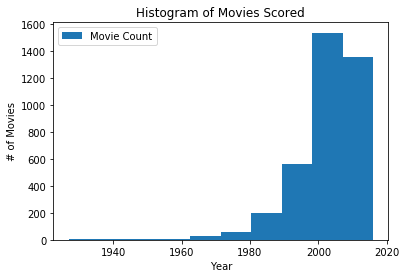

In [552]:
plt.hist(df['title_year'], label="Movie Count")
plt.xlabel('Year')
plt.ylabel('# of Movies')
plt.title('Histogram of Movies Scored')
plt.legend()

In [553]:
df.groupby('title_year')['movie_title'].count().tail().sort_values(ascending=False)

title_year
2013.0    163
2012.0    158
2014.0    145
2015.0    128
2016.0    59 
Name: movie_title, dtype: int64

The most movies were reviewed in 2012 on imdb according to our data

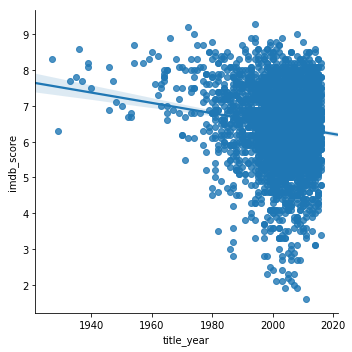

In [554]:
sns.lmplot('title_year', 'imdb_score', data=df)

* Although it is small, there seems to be a trend that the older the movie is, the higher imdb score it has
* Older movies all have an imdb score over 6
* There are clearly many more movies reviewed from 2000 onward
* Movies are slowly getting worse over time

### Number of Critical Reviews on imdb

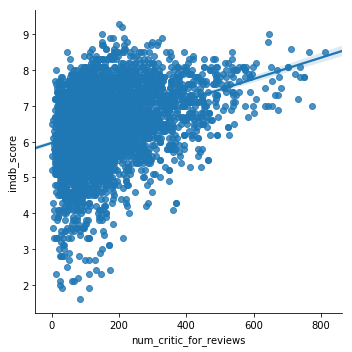

In [555]:
sns.lmplot("num_critic_for_reviews", "imdb_score", df)

* This is a surprising graph. It shows that as the number of critical reviews increases, the imdb score increases as well
* This could be becasue movies with higher imdb scores also could have many more reviews, their percentage of critical reviews could be smaller

### Percentage of Critical Reviews

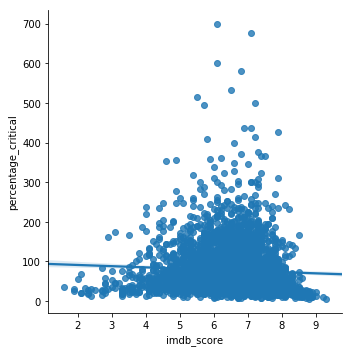

In [556]:
sns.lmplot("imdb_score", "percentage_critical", df)

* This graph shows that as the percentage of critical reviews goes down, the imdb score increases, which makes sense. 

### Duration

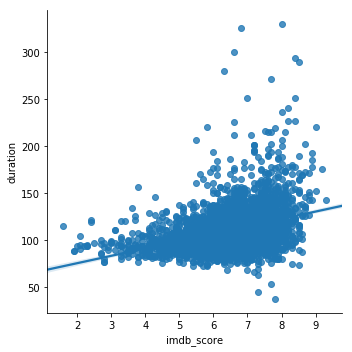

In [557]:
sns.lmplot("imdb_score", "duration", df)

* As duration increases, imdb score increases

### Number of likes on Director Facebook Page

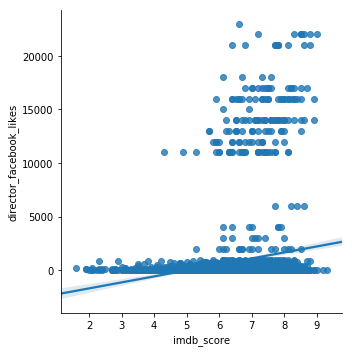

In [558]:
sns.lmplot("imdb_score", "director_facebook_likes", df)

* There is a slight positive relationship between imdb score and director facebook likes

### Number of likes on Actor 1, 2 & 3 Facebook Pages

Simplify actor facebook likes by combining these three columns

In [559]:
df['total_actor_likes'] = df['actor_1_facebook_likes'] + df['actor_2_facebook_likes'] + df['actor_3_facebook_likes']
df = df.drop('actor_1_facebook_likes', axis=1)
df = df.drop('actor_2_facebook_likes', axis=1)
df = df.drop('actor_3_facebook_likes', axis=1)
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,gross,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes
0,James Cameron,723.0,178.0,0.0,760505847.0,Avatar,886204,4834,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,2.0,237000000.0,2009.0,7.9,1.78,33000,523505847.0,220.888543,23.673870,2791.0
1,Gore Verbinski,302.0,169.0,563.0,309404152.0,Pirates of the Caribbean: At World's End,471220,48350,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,2.0,300000000.0,2007.0,7.1,2.35,0,9404152.0,3.134717,24.394184,46000.0
2,Sam Mendes,602.0,148.0,0.0,200074175.0,Spectre,275868,11700,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,2.0,245000000.0,2015.0,6.8,2.35,85000,-44925825.0,-18.337071,60.563380,11554.0
3,Christopher Nolan,813.0,164.0,22000.0,448130642.0,The Dark Knight Rises,1144337,106759,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,2.0,250000000.0,2012.0,8.5,2.35,164000,198130642.0,79.252257,30.099963,73000.0
5,Andrew Stanton,462.0,132.0,475.0,73058679.0,John Carter,212204,1873,1.0,alien|american civil war|male nipple|mars|princess,http://www.imdb.com/title/tt0401729/?ref_=fn_tt_tt_1,738.0,2.0,263700000.0,2012.0,6.6,2.35,24000,-190641321.0,-72.294775,62.601626,1802.0


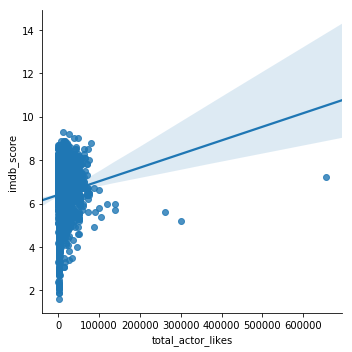

In [560]:
sns.lmplot('total_actor_likes', 'imdb_score', data=df)

* There is a positve relationship between imdb score and total actor likes on Facebook
* There are a few large ourliers. Because our goal is to predict the characteristics of successful movies, we will remove the outliers so they don't skew our data. 

In [561]:
df.sort_values('total_actor_likes',ascending=False).head(3)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,gross,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes
1902,Adam McKay,181.0,98.0,285.0,84136909.0,Anchorman: The Legend of Ron Burgundy,267921,656730,5.0,1970s|anchorman|news anchor|newsroom|tv station,http://www.imdb.com/title/tt0357413/?ref_=fn_tt_tt_1,577.0,2.0,26000000.0,2004.0,7.2,1.85,0,58136909.0,223.603496,31.369151,655000.0
1223,David R. Ellis,221.0,82.0,160.0,66466372.0,The Final Destination,75345,303717,0.0,attempted suicide|car crash|collapsing scaffold|overflowing bathtub|tooth knocked out,http://www.imdb.com/title/tt1144884/?ref_=fn_tt_tt_1,290.0,3.0,40000000.0,2009.0,5.2,2.35,0,26466372.0,66.165930,76.206897,301748.0
4592,Johnny Remo,2.0,112.0,74.0,96734.0,Hardflip,606,263584,3.0,family relationships|loss of mother|san diego california|single mother|suicide attempt,http://www.imdb.com/title/tt1907639/?ref_=fn_tt_tt_1,5.0,2.0,1000000.0,2012.0,5.6,1.85,706,-903266.0,-90.326600,40.000000,261875.0


* "Anchorman: The Legend of Ron Burgundy" and "The Final Destination" are the two largest outliers. They have the most popular top three actors. We will remove those two outliers from our data

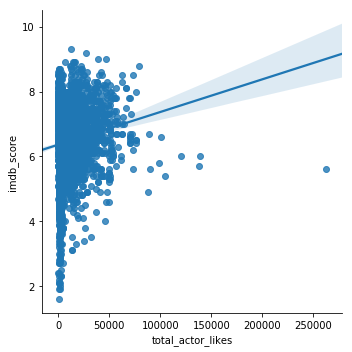

In [562]:
df = df.loc[df['total_actor_likes'] < 300000]
sns.lmplot('total_actor_likes', 'imdb_score', data=df)

### Number of People who Voted for the Movie

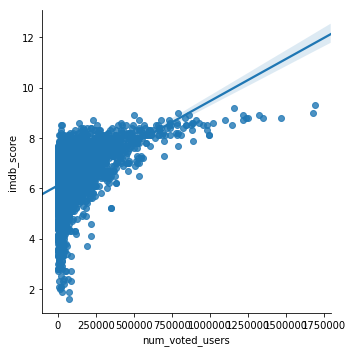

In [563]:
sns.lmplot('num_voted_users', 'imdb_score', data=df)

* As the number of people who voted increases, the imdb scores increases as well, this could mean that if more people are rating the movie, they are giving the movie good ratings

### Cast Total Facebook Likes

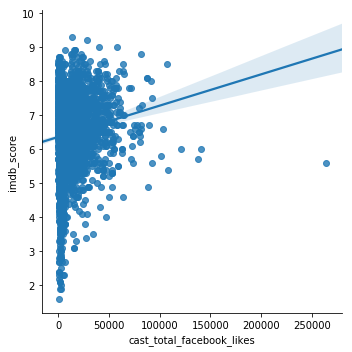

In [564]:
sns.lmplot('cast_total_facebook_likes', 'imdb_score', data=df)

* There is a postive relationship between cast total Facebook likes and imdb score
* There are also many great movies that have 0 total cast Facebook likes

### Number of Actors featured in Movie Poster

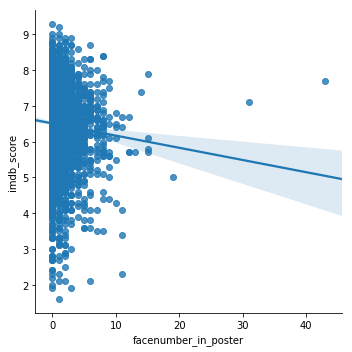

In [565]:
sns.lmplot('facenumber_in_poster', 'imdb_score', data=df)

* There is a slight negative relationship
* As the number of actors in the poster increases, the imdb score decreases

### Number of Users who gave a review

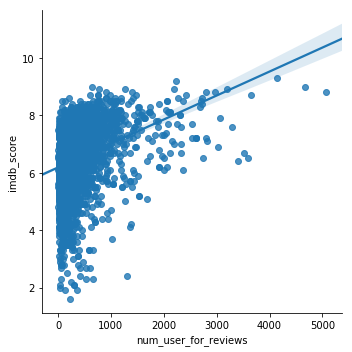

In [566]:
sns.lmplot('num_user_for_reviews', 'imdb_score', data=df)

* Strong positive relationship 
* As number of users who reviewed increases, imdb score increases

### Aspect Ratio

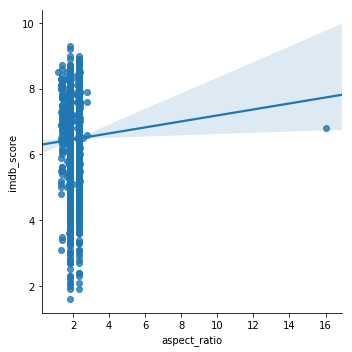

In [567]:
sns.lmplot('aspect_ratio', 'imdb_score', data=df)

* This isn't a very accurate representation of the data. I will create bins to place the data in so it is easier to analyze

In [568]:
def label_aspect_ratio(x):
   if x < 1.80:
      return 1
   if x < 1.85:
      return 2
   if x < 2.00:
      return 3
   if x < 2.30:
      return 4
   return 5

df['aspect_ratio_groups'] = df['aspect_ratio'].apply(label_aspect_ratio)
df.head(2)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,gross,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes,aspect_ratio_groups
0,James Cameron,723.0,178.0,0.0,760505847.0,Avatar,886204,4834,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,2.0,237000000.0,2009.0,7.9,1.78,33000,523505847.0,220.888543,23.673870,2791.0,1
1,Gore Verbinski,302.0,169.0,563.0,309404152.0,Pirates of the Caribbean: At World's End,471220,48350,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,2.0,300000000.0,2007.0,7.1,2.35,0,9404152.0,3.134717,24.394184,46000.0,5


In [569]:
df.groupby('aspect_ratio_groups')['imdb_score'].agg(['count','mean'])

,count,mean
aspect_ratio_groups,,
1,144,6.799306
3,1590,6.365283
4,15,7.353333
5,2007,6.513652


* This groupby shows the mean of each aspect ratio group as well as the number of movies in each group

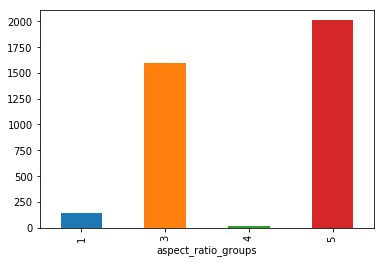

In [570]:
df.groupby(['aspect_ratio_groups']).size().plot(kind='bar')

* You can see that aspect ratio group 5 has the most movies in that bin. Those are movies where the aspect ratio is , 2.30, so larger. We have more larger movies than small movies. 

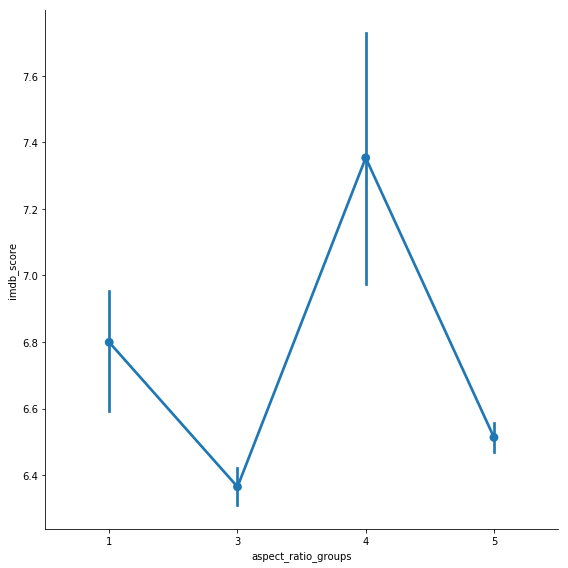

In [571]:
sns.factorplot("aspect_ratio_groups", "imdb_score", data=df, size=8)

* This is very interesting to me. Although group 5 has the greatest number of movies in that bin, it has some of the worst imdb scores out of the group. 

### Movie Facebook Likes

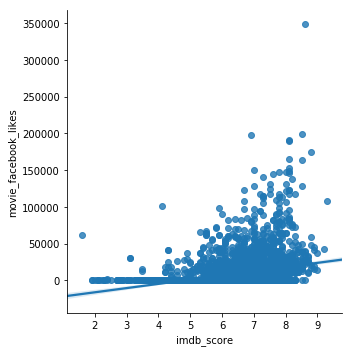

In [572]:
sns.lmplot('imdb_score', 'movie_facebook_likes', data=df)

* Slight positive relationship
* You can see that there are many that have 0 likes, but high imdb scores

### Gross Earnings for the Movie in dollars

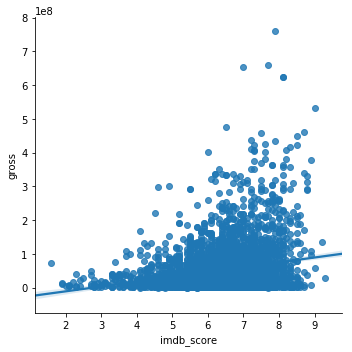

In [573]:
sns.lmplot("imdb_score", "gross", df)

* There is a slight negative relationship between gross and imdb score. This was suprising to me, I would expect more popular movies to have higher gross amounts

### Profit

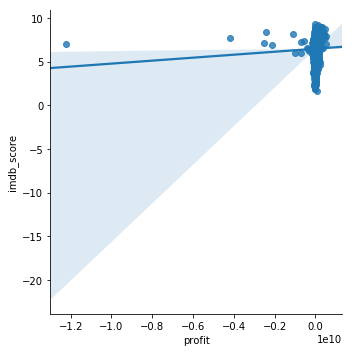

In [574]:
sns.lmplot('profit', 'imdb_score', data=df)

In [575]:
df.sort_values('profit',ascending=False).tail(3)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,gross,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes,aspect_ratio_groups
3005,Lajos Koltai,73.0,134.0,45.0,195888.0,Fateless,5603,11,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_tt_tt_1,45.0,3.0,2.500000e+09,2005.0,7.1,2.35,607,-2.499804e+09,-99.992164,162.222222,11.0,5
3859,Chan-wook Park,202.0,112.0,0.0,211667.0,Lady Vengeance,53508,907,0.0,cake|christian|lesbian sex|oral sex|pregnant schoolgirl,http://www.imdb.com/title/tt0451094/?ref_=fn_tt_tt_1,131.0,3.0,4.200000e+09,2005.0,7.7,2.35,4000,-4.199788e+09,-99.994960,154.198473,881.0,5
2988,Joon-ho Bong,363.0,110.0,584.0,2201412.0,The Host,68883,1173,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_tt_tt_1,279.0,3.0,1.221550e+10,2006.0,7.0,1.85,7000,-1.221330e+10,-99.981979,130.107527,1101.0,3


* These are three movies with the lowest profits, I also think it is important to note that many profits are negative, meaning they are losing money in producing these movies

Removie outliers to get a better look

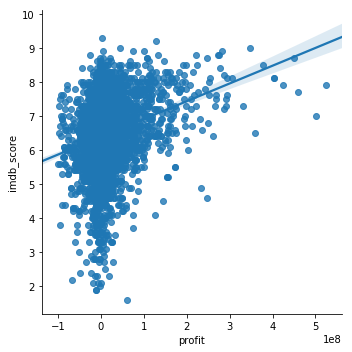

In [576]:
df = df.loc[df['profit'] > -100000000]
sns.lmplot('profit', 'imdb_score', data=df)

* As profit increases, imdb score increases

### Budget

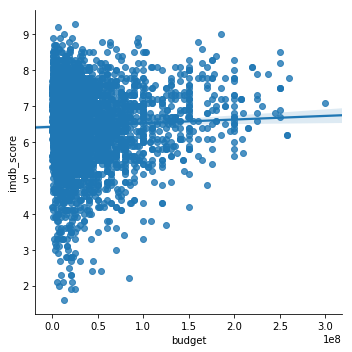

In [577]:
sns.lmplot('budget', 'imdb_score', data=df)

In [578]:
df.sort_values('budget',ascending=False).head(3)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,gross,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes,aspect_ratio_groups
1,Gore Verbinski,302.0,169.0,563.0,309404152.0,Pirates of the Caribbean: At World's End,471220,48350,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,2.0,300000000.0,2007.0,7.1,2.35,0,9404152.0,3.134717,24.394184,46000.0,5
7,Nathan Greno,324.0,100.0,15.0,200807262.0,Tangled,294810,2036,1.0,17th century|based on fairy tale|disney|flower|tower,http://www.imdb.com/title/tt0398286/?ref_=fn_tt_tt_1,387.0,1.0,260000000.0,2010.0,7.8,1.85,29000,-59192738.0,-22.766438,83.720930,1636.0,3
6,Sam Raimi,392.0,156.0,0.0,336530303.0,Spider-Man 3,383056,46055,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_tt_tt_1,1902.0,2.0,258000000.0,2007.0,6.2,2.35,0,78530303.0,30.438102,20.609884,39000.0,5


* "Pirates of the Caribbean: At World's End" and "Tangled" are two of the movies with the highest budgets. We will put restrictions on the data to remove outliers.

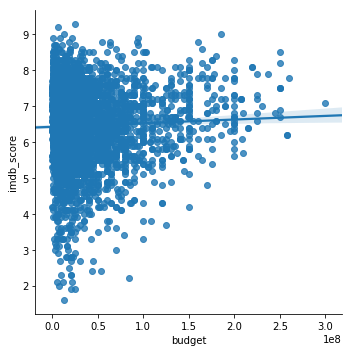

In [579]:
df = df.loc[df['budget'] < 4000000000]
sns.lmplot('budget', 'imdb_score', data=df)

* Surprisingly, there is only a slight positive relationship between budget and imdb score

### Return on Investment

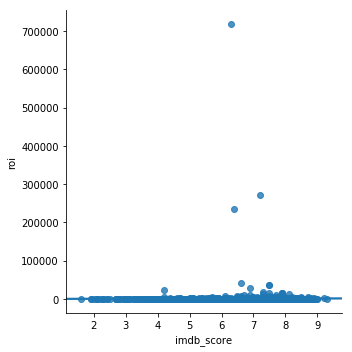

In [580]:
sns.lmplot('imdb_score', 'roi', data=df)

In [581]:
df.sort_values('roi',ascending=False).head(3)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,gross,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes,aspect_ratio_groups
4793,Oren Peli,409.0,84.0,110.0,107917283.0,Paranormal Activity,184824,330,0.0,dark force|entity|evil force|found footage|paranormal phenomenon,http://www.imdb.com/title/tt1179904/?ref_=fn_tt_tt_1,1189.0,3.0,15000.0,2007.0,6.3,1.85,12000,107902283.0,719348.553333,34.398654,319.0,3
4799,Jonathan Caouette,72.0,88.0,20.0,592014.0,Tarnation,5709,78,3.0,answering machine|home movie|lithium|schizophrenic|video diary,http://www.imdb.com/title/tt0390538/?ref_=fn_tt_tt_1,114.0,3.0,218.0,2003.0,7.2,1.37,754,591796.0,271466.055046,63.157895,78.0,1
4707,Daniel Myrick,360.0,81.0,19.0,140530114.0,The Blair Witch Project,186786,399,0.0,found footage|looking at the camera|lost in the woods|maryland|screaming in horror,http://www.imdb.com/title/tt0185937/?ref_=fn_tt_tt_1,3400.0,3.0,60000.0,1999.0,6.4,1.33,0,140470114.0,234116.856667,10.588235,379.0,1


* "Paranormal Activity", "Tarnation" and "The Blair Witch Project" have the highest ROI. We will remove the highest ROI's so our data is more consistent

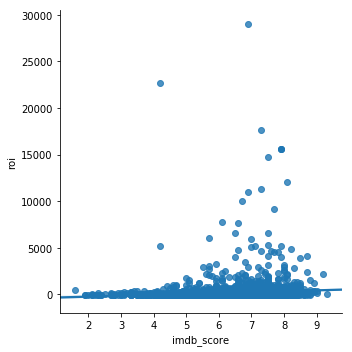

In [582]:
df = df.loc[df['roi'] < 30000]
sns.lmplot('imdb_score', 'roi', data=df)

* There were three values that were much greater than 50,000. After you remove those, you can see a more clear picture of the data
* There is a slight positive relationship between roi and imdb score

### Content Rating

#### # of Values per Content Rating

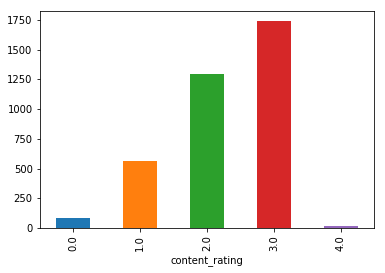

In [583]:
df.groupby(['content_rating']).size().plot(kind='bar')

* We turned this variable into a categorical variable, so 'G': 0, 'PG': 1, 'PG-13': 2, 'R': 3, 'X': 4

#### Average imdb Score

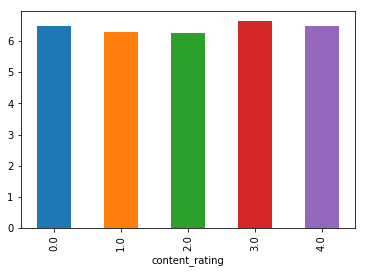

In [584]:
df.groupby('content_rating')['imdb_score'].mean().plot(kind='bar')

* You can see that R rated movies have the highest number of responses, and they also have the highest average imdb score
* All content ratings have pretty similar average imdb scores

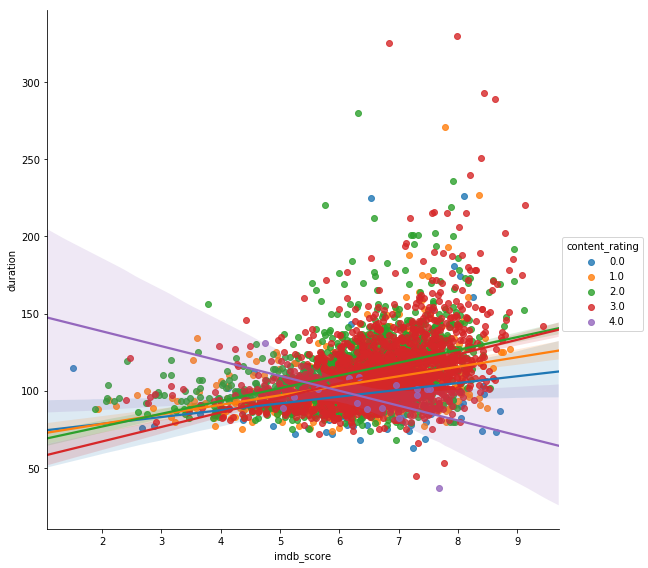

In [585]:
sns.lmplot("imdb_score", "duration", df, hue="content_rating", x_jitter=.15, size=8)

* I think this is a very interesting graph. All content ratings have a positive relationship with duration except for X rated movies. 
* They have a strong negative relationship, but there also aren't very many responses for X rated movies. 

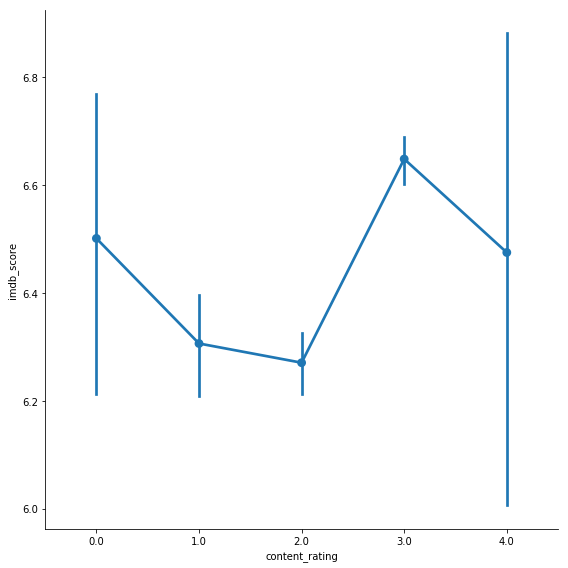

In [586]:
sns.factorplot("content_rating", "imdb_score", data=df, size=8)

* This is a good representation of the spread of our data relating to content ratings 
* G rated movies have some of the worst imdb scores

In [587]:
df.groupby('content_rating')['imdb_score'].agg(['count','mean'])

,count,mean
content_rating,,
0.0,86,6.501163
1.0,563,6.306217
2.0,1292,6.270588
3.0,1741,6.648420
4.0,16,6.475000


* Here we can see how many movies are in each content rating category, and the avearge imdb score

### Overall Analysis

#### Boxplot: imdb score

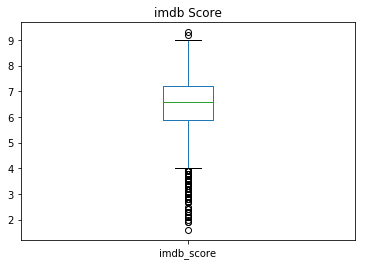

In [588]:
df[['imdb_score']].plot(kind='box', title='imdb Score')

* This is a good visual of the overall imdb scores. We can see that many of the scores fall between 6-7

#### Which movie has the highest imdb Score? 

In [589]:
df.sort_values('imdb_score',ascending=False).head(1)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,gross,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes,aspect_ratio_groups
1937,Frank Darabont,199.0,142.0,0.0,28341469.0,The Shawshank Redemption,1689764,13495,0.0,escape from prison|first person narration|prison|prison cell search|wrongful imprisonment,http://www.imdb.com/title/tt0111161/?ref_=fn_tt_tt_1,4144.0,3.0,25000000.0,1994.0,9.3,1.85,108000,3341469.0,13.365876,4.802124,12206.0,3


* "Fight Club" has the highest imdb score with 8.8

#### Which moive has the lowest imdb Score? 

In [590]:
df.sort_values('imdb_score',ascending=True).head(1)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,gross,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes,aspect_ratio_groups
2834,Jon M. Chu,84.0,115.0,209.0,73000942.0,Justin Bieber: Never Say Never,74351,714,1.0,boyhood friend|manager|plasma tv|prodigy|star,http://www.imdb.com/title/tt1702443/?ref_=fn_tt_tt_1,233.0,0.0,13000000.0,2011.0,1.6,1.85,62000,60000942.0,461.545708,36.051502,679.0,3


* "Disaster Movie" looks like it was a real disaster with an imdb score of 1.9

#### Which moive had the highest profit?

In [591]:
df.sort_values('profit',ascending=False).head(1)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,gross,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes,aspect_ratio_groups
0,James Cameron,723.0,178.0,0.0,760505847.0,Avatar,886204,4834,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,2.0,237000000.0,2009.0,7.9,1.78,33000,523505847.0,220.888543,23.67387,2791.0,1


* "Avatar" had the largest profit at $523505847

#### How many movies had an imdb score of 7 or higher? 

In [592]:
len(df.loc[df['imdb_score'] > 7])

1132

#### How many movies had an imdb score of 8 or higher? 

In [593]:
len(df.loc[df['imdb_score'] > 8])

156

#### How many moives had an imdb score of 2 or lower?

In [594]:
len(df.loc[df['imdb_score'] < 2])

3

#### What are the Movie Titles of the Top 5 imdb scores?

In [595]:
df.groupby('movie_title')['imdb_score'].max().sort_values(ascending=False).head(5)

movie_title
The Shawshank Redemption                          9.3
The Godfather                                     9.2
The Godfather: Part II                            9.0
The Dark Knight                                   9.0
The Lord of the Rings: The Return of the King     8.9
Name: imdb_score, dtype: float64

#### Which year had the highest average imdb score?

In [596]:
df.groupby('title_year')['imdb_score'].mean().sort_values(ascending=False).head()

title_year
1966.0    8.900000
1936.0    8.600000
1960.0    8.500000
1954.0    8.450000
1975.0    8.333333
Name: imdb_score, dtype: float64

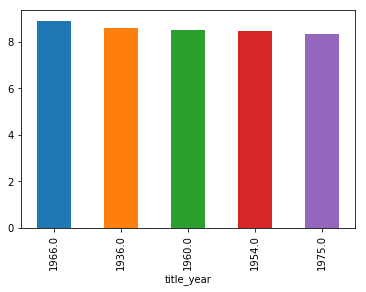

In [597]:
df.groupby('title_year')['imdb_score'].mean().sort_values(ascending=False).head().plot(kind='bar')

* Older movies have much higher average imdb scores

## 5. Correlation Analysis

In [598]:
corr1 = pd.DataFrame(df.corr()['imdb_score'].drop('imdb_score'))
corr1.sort_values(['imdb_score'], ascending = False)

,imdb_score
num_voted_users,0.484682
duration,0.374910
num_critic_for_reviews,0.352034
num_user_for_reviews,0.330359
movie_facebook_likes,0.284155
profit,0.259790
gross,0.217574
director_facebook_likes,0.192371
total_actor_likes,0.142423
cast_total_facebook_likes,0.136128


* Number of voted users still has the highest positive correlation with imdb score 
* Number of faces in the movie poster has the largest negative correlation with imdb score, so the more faces in the poster, the lower the imdb score will be

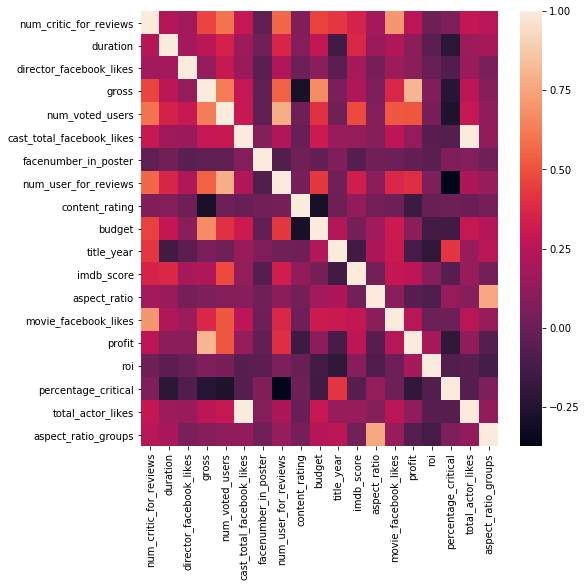

In [599]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr())

### High imdb Score Correlation

* Let's look at the correlation of data with high imdb scores (greater than 7.8)

In [600]:
high = df.loc[df['imdb_score'] > 7.8]
high.describe()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes,aspect_ratio_groups
count,264.000000,264.000000,264.000000,2.640000e+02,2.640000e+02,264.000000,264.000000,264.000000,262.000000,2.640000e+02,264.000000,264.000000,264.000000,264.000000,2.640000e+02,264.000000,264.000000,264.000000,264.000000
mean,277.681818,132.598485,3007.875000,1.045314e+08,4.235402e+05,15107.912879,1.056818,904.268939,2.324427,4.207033e+07,1997.079545,8.182197,2.092500,33094.696970,6.246110e+07,612.111007,47.059626,13850.553030,3.931818
std,162.547370,36.479665,6194.796657,1.256641e+08,3.201267e+05,18561.552705,1.709010,762.243821,0.912711,5.491771e+07,16.079334,0.276908,0.314138,44148.842295,9.463121e+07,1926.925259,46.762247,16626.564599,1.285740
min,12.000000,73.000000,0.000000,8.060000e+03,5.475000e+03,6.000000,0.000000,26.000000,0.000000,1.800000e+05,1927.000000,7.900000,1.180000,0.000000,-7.781050e+07,-99.798500,4.802124,6.000000,1.000000
25%,151.000000,108.750000,0.000000,1.372836e+07,1.683492e+05,1932.250000,0.000000,419.500000,2.000000,6.500000e+06,1990.000000,8.000000,1.850000,10000.000000,9.455355e+05,11.281924,23.226933,1473.000000,3.000000
50%,234.000000,125.000000,162.000000,5.455735e+07,3.614680e+05,6489.500000,1.000000,712.000000,3.000000,1.825000e+07,2001.500000,8.100000,2.350000,18000.000000,2.459409e+07,128.598069,32.325358,6246.000000,5.000000
75%,364.500000,148.000000,767.000000,1.614185e+08,5.945030e+05,21541.750000,1.000000,1097.750000,3.000000,5.500000e+07,2008.000000,8.300000,2.350000,38000.000000,1.012523e+08,457.724879,53.319141,19784.000000,5.000000
max,813.000000,330.000000,22000.000000,7.605058e+08,1.689764e+06,106759.000000,15.000000,5060.000000,3.000000,2.500000e+08,2016.000000,9.300000,2.760000,349000.000000,5.235058e+08,15566.666667,426.923077,79000.000000,5.000000


In [601]:
high.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,gross,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes,aspect_ratio_groups
0,James Cameron,723.0,178.0,0.0,760505847.0,Avatar,886204,4834,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,2.0,237000000.0,2009.0,7.9,1.78,33000,523505847.0,220.888543,23.673870,2791.0,1
3,Christopher Nolan,813.0,164.0,22000.0,448130642.0,The Dark Knight Rises,1144337,106759,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.0,2.0,250000000.0,2012.0,8.5,2.35,164000,198130642.0,79.252257,30.099963,73000.0,5
17,Joss Whedon,703.0,173.0,0.0,623279547.0,The Avengers,995415,87697,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_tt_tt_1,1722.0,2.0,220000000.0,2012.0,8.1,1.85,123000,403279547.0,183.308885,40.824623,66000.0,3
23,Peter Jackson,509.0,186.0,0.0,258355354.0,The Hobbit: The Desolation of Smaug,483540,9152,6.0,dwarf|elf|lake town|mountain|sword and sorcery,http://www.imdb.com/title/tt1170358/?ref_=fn_tt_tt_1,951.0,2.0,225000000.0,2013.0,7.9,2.35,83000,33355354.0,14.824602,53.522608,6745.0,5
27,Anthony Russo,516.0,147.0,94.0,407197282.0,Captain America: Civil War,272670,64798,0.0,based on comic book|knife|marvel cinematic universe|returning character killed off|superhero,http://www.imdb.com/title/tt3498820/?ref_=fn_tt_tt_1,1022.0,2.0,250000000.0,2016.0,8.2,2.35,72000,157197282.0,62.878913,50.489237,51000.0,5


In [602]:
corr2 = pd.DataFrame(high.corr()['imdb_score'].drop('imdb_score'))
corr2.sort_values(['imdb_score'], ascending = False)

,imdb_score
num_voted_users,0.669493
num_user_for_reviews,0.474574
director_facebook_likes,0.231341
duration,0.229538
profit,0.183127
movie_facebook_likes,0.153316
gross,0.153266
total_actor_likes,0.133327
cast_total_facebook_likes,0.130865
content_rating,0.037629


* The correlation of number of voted users with imdb score has increased significantly to 0.517119, so imdb score increases with the number of users who vote
* Movie release year has a very strong negative relationship with imdb score meaning older movies have a much higher imdb score

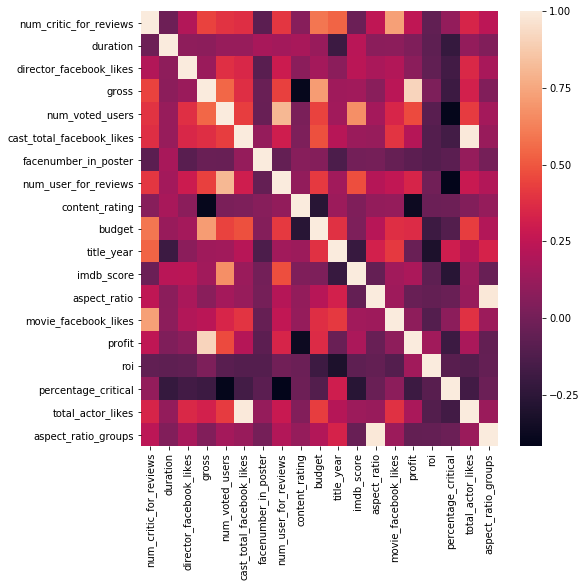

In [603]:
plt.figure(figsize=(8, 8))
sns.heatmap(high.corr())

### Low imdb Score Correlation

In [604]:
low = df.loc[df['imdb_score'] < 4]
low.describe()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes,aspect_ratio_groups
count,84.000000,84.000000,84.000000,8.400000e+01,84.000000,84.000000,84.000000,84.000000,84.000000,8.400000e+01,84.000000,84.000000,84.000000,84.000000,8.400000e+01,84.000000,84.000000,84.000000,84.000000
mean,78.357143,95.773810,98.380952,2.010639e+07,25859.952381,4285.369048,1.619048,234.500000,1.821429,2.617143e+07,2003.202381,3.203571,1.992262,2119.535714,-6.065038e+06,8.282751,48.720969,3407.857143,3.547619
std,50.063969,12.862902,185.322897,2.248373e+07,28142.724096,5840.160977,2.317585,222.372611,0.763011,2.607067e+07,6.774829,0.589966,0.264030,8383.610020,2.449759e+07,122.839712,36.238541,5628.340129,1.091089
min,4.000000,76.000000,0.000000,5.561000e+03,397.000000,286.000000,0.000000,10.000000,0.000000,2.500000e+05,1982.000000,1.600000,1.330000,0.000000,-9.558890e+07,-99.944390,12.643678,222.000000,1.000000
25%,35.750000,88.000000,8.750000,4.504113e+06,8108.000000,1664.250000,0.000000,74.250000,1.000000,1.000000e+07,1999.750000,2.800000,1.850000,0.000000,-1.440176e+07,-78.192946,24.808421,1251.250000,3.000000
50%,68.500000,93.000000,33.500000,1.322164e+07,19479.500000,2629.000000,1.000000,179.500000,2.000000,1.950000e+07,2004.000000,3.300000,1.850000,195.500000,-4.564420e+06,-42.291221,36.172469,1787.000000,3.000000
75%,111.000000,99.250000,84.000000,3.205541e+07,34418.750000,4297.500000,2.000000,307.250000,2.000000,2.775000e+07,2008.000000,3.625000,2.350000,658.500000,5.314766e+06,44.742654,59.318182,2518.500000,5.000000
max,212.000000,156.000000,892.000000,1.072850e+08,189855.000000,34319.000000,11.000000,1308.000000,3.000000,1.250000e+08,2016.000000,3.900000,2.350000,62000.000000,7.449727e+07,461.545708,186.206897,32517.000000,5.000000


In [605]:
low.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,gross,movie_title,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes,aspect_ratio_groups
217,Joel Schumacher,183.0,125.0,541.0,107285004.0,Batman & Robin,189855,2699,3.0,butler|critically bashed|cure|freeze|gotham,http://www.imdb.com/title/tt0118688/?ref_=fn_tt_tt_1,1018.0,2.0,125000000.0,1997.0,3.7,1.85,0,-17714996.0,-14.171997,17.976424,2219.0,3
273,Bo Welch,109.0,82.0,34.0,100446895.0,The Cat in the Hat,36033,2762,1.0,based on cult comic book|cat|home alone|imagination|talking cat,http://www.imdb.com/title/tt0312528/?ref_=fn_tt_tt_1,456.0,1.0,109000000.0,2003.0,3.8,1.85,946,-8553105.0,-7.846885,23.903509,1937.0,3
313,Pitof,212.0,87.0,26.0,40198710.0,Catwoman,87451,3144,0.0,based on cult comic book|bechdel test passed|cat|detective|radical transformation,http://www.imdb.com/title/tt0327554/?ref_=fn_tt_tt_1,660.0,2.0,100000000.0,2004.0,3.3,2.35,0,-59801290.0,-59.801290,32.121212,2218.0,5
319,Lawrence Guterman,78.0,94.0,6.0,17010646.0,Son of the Mask,40751,1195,0.0,baby|cartoon on tv|cartoonist|dog|mask,http://www.imdb.com/title/tt0362165/?ref_=fn_tt_tt_1,239.0,1.0,84000000.0,2005.0,2.2,1.85,881,-66989354.0,-79.749231,32.635983,1011.0,3
321,Ron Underwood,66.0,95.0,31.0,4411102.0,The Adventures of Pluto Nash,20295,6161,1.0,casino|future|laser gun|moon|nightclub,http://www.imdb.com/title/tt0180052/?ref_=fn_tt_tt_1,164.0,2.0,100000000.0,2002.0,3.8,1.85,416,-95588898.0,-95.588898,40.243902,4378.0,3


In [606]:
corr3 = pd.DataFrame(low.corr()['imdb_score'].drop('imdb_score'))
corr3.sort_values(['imdb_score'], ascending = False)

,imdb_score
percentage_critical,0.249005
cast_total_facebook_likes,0.182148
total_actor_likes,0.166949
budget,0.111592
gross,0.109008
content_rating,0.103140
num_critic_for_reviews,0.050252
facenumber_in_poster,0.038897
duration,-0.002433
aspect_ratio,-0.004539


* For movies with low imdb scores, percentage of critical reviews has the highest positive correlation, meaning the more negative reviews about the movie, the higher the imdb score, which doesn't make sense logically
* Movie Facebook likes has the strongest negative correlataion with imdb score, showing that the more Facebook likes a movie has, the lower it's imdb scores for poor performing movies

# 6. Regression

## a) Data Preparation

Import Packages

In [607]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import chi2

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

Let's take a look at our data and see what columns we can remove. We will remove irrelevant and categorical columns. 

In [608]:
df.columns

Index([u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'gross', u'movie_title',
       u'num_voted_users', u'cast_total_facebook_likes',
       u'facenumber_in_poster', u'plot_keywords', u'movie_imdb_link',
       u'num_user_for_reviews', u'content_rating', u'budget', u'title_year',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes', u'profit',
       u'roi', u'percentage_critical', u'total_actor_likes',
       u'aspect_ratio_groups'],
      dtype='object')

Drop columns that are unhelpful with regression

In [609]:
df = df.drop(['director_name', 'movie_title', 'movie_imdb_link','plot_keywords', 'aspect_ratio'], axis=1)

Lets look at the columns that we have left.. 

In [610]:
df.info() f

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3715 entries, 0 to 5042
Data columns (total 18 columns):
num_critic_for_reviews       3715 non-null float64
duration                     3715 non-null float64
director_facebook_likes      3715 non-null float64
gross                        3715 non-null float64
num_voted_users              3715 non-null int64
cast_total_facebook_likes    3715 non-null int64
facenumber_in_poster         3715 non-null float64
num_user_for_reviews         3715 non-null float64
content_rating               3698 non-null float64
budget                       3715 non-null float64
title_year                   3715 non-null float64
imdb_score                   3715 non-null float64
movie_facebook_likes         3715 non-null int64
profit                       3715 non-null float64
roi                          3715 non-null float64
percentage_critical          3715 non-null float64
total_actor_likes            3715 non-null float64
aspect_ratio_groups          371

I believe content rating would be beneficial to include in our analysis. Lets convert content_rating to dummy variables so that we can use it in our analysis. 

In [611]:
df = pd.get_dummies(df, columns=["content_rating"])
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes,aspect_ratio_groups,content_rating_0.0,content_rating_1.0,content_rating_2.0,content_rating_3.0,content_rating_4.0
0,723.0,178.0,0.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,7.9,33000,523505847.0,220.888543,23.673870,2791.0,1,0,0,1,0,0
1,302.0,169.0,563.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,7.1,0,9404152.0,3.134717,24.394184,46000.0,5,0,0,1,0,0
2,602.0,148.0,0.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,6.8,85000,-44925825.0,-18.337071,60.563380,11554.0,5,0,0,1,0,0
3,813.0,164.0,22000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,8.5,164000,198130642.0,79.252257,30.099963,73000.0,5,0,0,1,0,0
6,392.0,156.0,0.0,336530303.0,383056,46055,0.0,1902.0,258000000.0,2007.0,6.2,0,78530303.0,30.438102,20.609884,39000.0,5,0,0,1,0,0


In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3715 entries, 0 to 5042
Data columns (total 22 columns):
num_critic_for_reviews       3715 non-null float64
duration                     3715 non-null float64
director_facebook_likes      3715 non-null float64
gross                        3715 non-null float64
num_voted_users              3715 non-null int64
cast_total_facebook_likes    3715 non-null int64
facenumber_in_poster         3715 non-null float64
num_user_for_reviews         3715 non-null float64
budget                       3715 non-null float64
title_year                   3715 non-null float64
imdb_score                   3715 non-null float64
movie_facebook_likes         3715 non-null int64
profit                       3715 non-null float64
roi                          3715 non-null float64
percentage_critical          3715 non-null float64
total_actor_likes            3715 non-null float64
aspect_ratio_groups          3715 non-null int64
content_rating_0.0           3715 

Now we need to deal with missing variables. Since we are only missing data in the content_rating category, we will just drop all NA since we won't be losing very much data. 

In [613]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3715 entries, 0 to 5042
Data columns (total 22 columns):
num_critic_for_reviews       3715 non-null float64
duration                     3715 non-null float64
director_facebook_likes      3715 non-null float64
gross                        3715 non-null float64
num_voted_users              3715 non-null int64
cast_total_facebook_likes    3715 non-null int64
facenumber_in_poster         3715 non-null float64
num_user_for_reviews         3715 non-null float64
budget                       3715 non-null float64
title_year                   3715 non-null float64
imdb_score                   3715 non-null float64
movie_facebook_likes         3715 non-null int64
profit                       3715 non-null float64
roi                          3715 non-null float64
percentage_critical          3715 non-null float64
total_actor_likes            3715 non-null float64
aspect_ratio_groups          3715 non-null int64
content_rating_0.0           3715 

Our data is now clean and prepared for regression

## b) Regression Models

Now we will attempt multiple regression models to test their accuracy and try to find the best model. 

#### Define X & y

In [614]:
y = df['imdb_score']
X = df.drop(['imdb_score'], axis =1)

### i) Simple Multiple Regression

According to our class notes, a multiple linear regression is testing how x variables are related to a y value. The coefficients  are found by minimizing the error of prediction. Our goal is to have a low Mean Square Error, and a high r squared, or variance. 

In [615]:
model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

In [616]:
print 'Coefficients: ', model1.coef_
print "y-intercept ", model1.intercept_

Coefficients:  [ 2.58810211e-03  1.27388151e-02  2.86255174e-06 -1.40983781e-09
  3.24326134e-06 -6.48712604e-05 -2.37154839e-02 -4.30062105e-04
 -3.27912142e-09 -1.98273757e-02 -2.21072980e-06  1.77231605e-09
  2.84686281e-05  1.70511034e-03  6.94346867e-05 -2.16131396e-02
  2.94896651e-01  1.57065503e-01 -1.16702259e-02  2.16792046e-01
  1.30122792e-02]
y-intercept  44.20530758859492


In [617]:
pd.DataFrame(zip(X.columns, np.transpose(model1.coef_)))

,0,1
0,num_critic_for_reviews,2.588102e-03
1,duration,1.273882e-02
2,director_facebook_likes,2.862552e-06
3,gross,-1.409838e-09
4,num_voted_users,3.243261e-06
5,cast_total_facebook_likes,-6.487126e-05
6,facenumber_in_poster,-2.371548e-02
7,num_user_for_reviews,-4.300621e-04
8,budget,-3.279121e-09
9,title_year,-1.982738e-02


In [618]:
print "mean square error: ", mean_squared_error(y, model1_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)

mean square error:  0.6570386132449769
variance or r-squared:  0.4127115943748595


This model has a fairly high mean square error and a low r-square value, but is too large and would be too complex to be practical. Let's choose fewer X variables and make the regression more practical. 

### ii) Ridge

Let's try Ridge for Regression

In [619]:
#Fit the model
rig = lm.Ridge(alpha=0.9)           
rig.fit(X, y)
rig_y = rig.predict(X)

In [620]:
print 'Coefficients: ', rig.coef_
print "y-intercept ", rig.intercept_

Coefficients:  [ 2.58441453e-03  1.27375660e-02  2.88740671e-06 -2.27934030e-09
  3.24439956e-06 -6.48828986e-05 -2.37413800e-02 -4.30130361e-04
 -2.40784239e-09 -1.97319974e-02 -2.21242917e-06  2.64317394e-09
  2.84633710e-05  1.70110041e-03  6.94446739e-05 -2.15973214e-02
  2.61170487e-01  1.25625552e-01 -4.31004750e-02  1.85545848e-01
 -1.59148658e-02]
y-intercept  44.0463887623053


In [621]:
coef = ["%.3f" % i for i in rig.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('num_critic_for_reviews', '0.003'),
 ('duration', '0.013'),
 ('director_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.024'),
 ('num_user_for_reviews', '-0.000'),
 ('budget', '-0.000'),
 ('title_year', '-0.020'),
 ('movie_facebook_likes', '-0.000'),
 ('profit', '0.000'),
 ('roi', '0.000'),
 ('percentage_critical', '0.002'),
 ('total_actor_likes', '0.000'),
 ('aspect_ratio_groups', '-0.022'),
 ('content_rating_0.0', '0.261'),
 ('content_rating_1.0', '0.126'),
 ('content_rating_2.0', '-0.043'),
 ('content_rating_3.0', '0.186'),
 ('content_rating_4.0', '-0.016')]

In [622]:
sorted(zip(coef, xcolumns), reverse=True)

[('0.261', 'content_rating_0.0'),
 ('0.186', 'content_rating_3.0'),
 ('0.126', 'content_rating_1.0'),
 ('0.013', 'duration'),
 ('0.003', 'num_critic_for_reviews'),
 ('0.002', 'percentage_critical'),
 ('0.000', 'total_actor_likes'),
 ('0.000', 'roi'),
 ('0.000', 'profit'),
 ('0.000', 'num_voted_users'),
 ('0.000', 'director_facebook_likes'),
 ('-0.043', 'content_rating_2.0'),
 ('-0.024', 'facenumber_in_poster'),
 ('-0.022', 'aspect_ratio_groups'),
 ('-0.020', 'title_year'),
 ('-0.016', 'content_rating_4.0'),
 ('-0.000', 'num_user_for_reviews'),
 ('-0.000', 'movie_facebook_likes'),
 ('-0.000', 'gross'),
 ('-0.000', 'cast_total_facebook_likes'),
 ('-0.000', 'budget')]

In [623]:
print "mean square error: ", mean_squared_error(y, rig_y)
print "variance or r-squared: ", explained_variance_score(y, rig_y)

mean square error:  0.6570426692174428
variance or r-squared:  0.41270796897818607


Ridge gave us about the same results as our simple multiple regression, let's see if we can do even better. 

### iii) Feature Selection

Feature selection is the next regression we will try

In [624]:
#selec only 9 X variables
X_new = SelectKBest(f_regression, k=9).fit_transform(X, y)
X_new

array([[ 7.23000000e+02,  1.78000000e+02,  0.00000000e+00, ...,
         3.30000000e+04,  5.23505847e+08,  0.00000000e+00],
       [ 3.02000000e+02,  1.69000000e+02,  5.63000000e+02, ...,
         0.00000000e+00,  9.40415200e+06,  0.00000000e+00],
       [ 6.02000000e+02,  1.48000000e+02,  0.00000000e+00, ...,
         8.50000000e+04, -4.49258250e+07,  0.00000000e+00],
       ...,
       [ 1.43000000e+02,  7.70000000e+01,  2.91000000e+02, ...,
         1.90000000e+04,  4.17760000e+05,  0.00000000e+00],
       [ 5.60000000e+01,  8.10000000e+01,  0.00000000e+00, ...,
         0.00000000e+00,  2.03392000e+06,  1.00000000e+00],
       [ 4.30000000e+01,  9.00000000e+01,  1.60000000e+01, ...,
         4.56000000e+02,  8.41220000e+04,  0.00000000e+00]])

In [625]:
df.head()
#this is how you know which columns it is using...

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes,aspect_ratio_groups,content_rating_0.0,content_rating_1.0,content_rating_2.0,content_rating_3.0,content_rating_4.0
0,723.0,178.0,0.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,7.9,33000,523505847.0,220.888543,23.673870,2791.0,1,0,0,1,0,0
1,302.0,169.0,563.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,7.1,0,9404152.0,3.134717,24.394184,46000.0,5,0,0,1,0,0
2,602.0,148.0,0.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,6.8,85000,-44925825.0,-18.337071,60.563380,11554.0,5,0,0,1,0,0
3,813.0,164.0,22000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,8.5,164000,198130642.0,79.252257,30.099963,73000.0,5,0,0,1,0,0
6,392.0,156.0,0.0,336530303.0,383056,46055,0.0,1902.0,258000000.0,2007.0,6.2,0,78530303.0,30.438102,20.609884,39000.0,5,0,0,1,0,0


In [626]:
model2 = lm.LinearRegression()
model2.fit(X_new, y)
model2_y = model2.predict(X_new)

print "mean square error: ", mean_squared_error(y, model2_y)
print "variance or r-squared: ", explained_variance_score(y, model2_y)

mean square error:  0.7056384037223752
variance or r-squared:  0.36927108283136945


This is still a very high MSE and low variance. We will try a different method to imporve this. 

### iv) Lasso Method

In [627]:
y = df['imdb_score']
X = df.drop(['imdb_score'], axis =1)

In [628]:
model3 = lm.Lasso(alpha=0.1)             #higher alpha (penality parameter), fewer predictors
model3.fit(X, y)
model3_y = model3.predict(X)

/Users/haileyrobinson/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [629]:
print 'Coefficients: ', model3.coef_
print "y-intercept ", model3.intercept_

Coefficients:  [ 2.59901895e-03  1.21946246e-02  3.77004366e-06 -3.19848541e-09
  3.34109120e-06 -6.87820134e-05 -2.93244633e-03 -4.31531792e-04
 -2.13372395e-09 -2.04174130e-02 -2.41351224e-06  3.44019322e-09
  3.38239097e-05  1.69734254e-03  7.30502767e-05 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00]
y-intercept  45.48250548720662


In [630]:
coef = ["%.3f" % i for i in model3.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('num_critic_for_reviews', '0.003'),
 ('duration', '0.012'),
 ('director_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.003'),
 ('num_user_for_reviews', '-0.000'),
 ('budget', '-0.000'),
 ('title_year', '-0.020'),
 ('movie_facebook_likes', '-0.000'),
 ('profit', '0.000'),
 ('roi', '0.000'),
 ('percentage_critical', '0.002'),
 ('total_actor_likes', '0.000'),
 ('aspect_ratio_groups', '-0.000'),
 ('content_rating_0.0', '0.000'),
 ('content_rating_1.0', '0.000'),
 ('content_rating_2.0', '-0.000'),
 ('content_rating_3.0', '0.000'),
 ('content_rating_4.0', '-0.000')]

In [631]:
sorted(zip(coef, xcolumns), reverse=True)

[('0.012', 'duration'),
 ('0.003', 'num_critic_for_reviews'),
 ('0.002', 'percentage_critical'),
 ('0.000', 'total_actor_likes'),
 ('0.000', 'roi'),
 ('0.000', 'profit'),
 ('0.000', 'num_voted_users'),
 ('0.000', 'director_facebook_likes'),
 ('0.000', 'content_rating_3.0'),
 ('0.000', 'content_rating_1.0'),
 ('0.000', 'content_rating_0.0'),
 ('-0.020', 'title_year'),
 ('-0.003', 'facenumber_in_poster'),
 ('-0.000', 'num_user_for_reviews'),
 ('-0.000', 'movie_facebook_likes'),
 ('-0.000', 'gross'),
 ('-0.000', 'content_rating_4.0'),
 ('-0.000', 'content_rating_2.0'),
 ('-0.000', 'cast_total_facebook_likes'),
 ('-0.000', 'budget'),
 ('-0.000', 'aspect_ratio_groups')]

In [632]:
print "mean square error: ", mean_squared_error(y, model3_y)
print "variance or r-squared: ", explained_variance_score(y, model3_y)

mean square error:  0.6708268275570384
variance or r-squared:  0.40038711566613383


Lasso gives us a smaller MSE and a higher variance, but RandomForestRegressor should give us an even more accurate model. 

### v) RandomForestRegressor for Feature Selection 

In [633]:
#assigning columns to X and Y variables
y = df['imdb_score']
X = df.drop(['imdb_score'], axis =1)

regr = RandomForestRegressor(random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print "mean square error: ", mean_squared_error(y, regr_predicted)
print "variance or r-squared: ", explained_variance_score(y, regr_predicted)

mean square error:  0.09780107671601615
variance or r-squared:  0.912747813769573


In [634]:
sorted(zip(regr.feature_importances_, X.columns))

[(0.000488914626712414, 'content_rating_4.0'),
 (0.003472585143210717, 'content_rating_0.0'),
 (0.0035130364709549306, 'content_rating_1.0'),
 (0.004641756081622048, 'aspect_ratio_groups'),
 (0.004864992149094482, 'content_rating_3.0'),
 (0.00996928695918522, 'content_rating_2.0'),
 (0.01533888258593652, 'facenumber_in_poster'),
 (0.023957784595222156, 'total_actor_likes'),
 (0.02464024130012722, 'profit'),
 (0.02655938557770556, 'movie_facebook_likes'),
 (0.029037181372944948, 'roi'),
 (0.031069141894488957, 'director_facebook_likes'),
 (0.03170750084986046, 'num_critic_for_reviews'),
 (0.03636910725465251, 'cast_total_facebook_likes'),
 (0.0396100181924137, 'title_year'),
 (0.044492317370794864, 'num_user_for_reviews'),
 (0.05013948598453919, 'gross'),
 (0.05650642150675035, 'percentage_critical'),
 (0.1111817203422774, 'budget'),
 (0.11774637580073073, 'duration'),
 (0.3346938639407756, 'num_voted_users')]

This is our best model so far! However, we didn't do any validation. It is creating a regression model based on our full dataset, and then comparing it against our data set, so of course it would be fairly accurate. Let's look at the coefficients to see how important each variable is. 

In [635]:
sorted(zip(regr2.feature_importances_, X.columns))

[(0.0, 'content_rating_0.0'),
 (0.0, 'content_rating_1.0'),
 (0.0, 'percentage_critical'),
 (1.6259564547698325e-07, 'aspect_ratio_groups'),
 (2.8528987055159547e-07, 'total_actor_likes'),
 (5.872797218520238e-07, 'roi'),
 (8.894954832839153e-07, 'num_voted_users'),
 (1.5746909494642611e-06, 'director_facebook_likes'),
 (1.9341285369669427e-06, 'budget'),
 (2.5348816502885987e-06, 'gross'),
 (3.984612667587588e-06, 'duration'),
 (4.144286228465339e-06, 'profit'),
 (4.790816802688585e-06, 'facenumber_in_poster'),
 (5.079004679569849e-06, 'cast_total_facebook_likes'),
 (1.0647373450547123e-05, 'title_year'),
 (1.4722013014368106e-05, 'movie_facebook_likes'),
 (1.5023414398463808e-05, 'num_critic_for_reviews'),
 (0.9999336401169006, 'num_user_for_reviews')]

It looks like number of critical reviews has the biggest impact on our data. This shows that is is a very important variable for predicting imdb scores

# 7. Classification

According to our notes, classification labels the data points. It looks for a "rule" that assigns labels to new points. It is about finding a function which separates different classes in y value and is a form of supervised learning. 

## a) Data Preparation

Create a new column (imdb_score_category):

In [636]:
df['imdb_score_category'] = 1
df['imdb_score_category'][(df['imdb_score'] >= 4) & (df['imdb_score'] <=6)] = 2
df['imdb_score_category'][(df['imdb_score'] > 6) & (df['imdb_score'] <=8)] = 3
df['imdb_score_category'][df['imdb_score'] > 8] = 4

/Users/haileyrobinson/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/haileyrobinson/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/haileyrobinson/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing t

Now, instead of having individual imdb scores, they are categorized into bins. This will help us predict if movies are bad, OK, good or excellent. The bins are: less than 4, 4~6, 6~8 and 8~10, which represents bad, OK, good and excellent respectively

In [637]:
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes,aspect_ratio_groups,content_rating_0.0,content_rating_1.0,content_rating_2.0,content_rating_3.0,content_rating_4.0,imdb_score_category
0,723.0,178.0,0.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,7.9,33000,523505847.0,220.888543,23.673870,2791.0,1,0,0,1,0,0,3
1,302.0,169.0,563.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,7.1,0,9404152.0,3.134717,24.394184,46000.0,5,0,0,1,0,0,3
2,602.0,148.0,0.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,6.8,85000,-44925825.0,-18.337071,60.563380,11554.0,5,0,0,1,0,0,3
3,813.0,164.0,22000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,8.5,164000,198130642.0,79.252257,30.099963,73000.0,5,0,0,1,0,0,4
6,392.0,156.0,0.0,336530303.0,383056,46055,0.0,1902.0,258000000.0,2007.0,6.2,0,78530303.0,30.438102,20.609884,39000.0,5,0,0,1,0,0,3


The very last column is now imdb_score_category, we can now drop imdb_score since we replaced the value with the bins.

In [638]:
df = df.drop('imdb_score', axis=1)

Now we will reset the X & y variables

In [639]:
y = df['imdb_score_category']
X = df.drop(['imdb_score_category'], axis =1)

## b) Classification Models

### i) Decision tree

The first classification method we will try is Decision Tree

In [640]:
y = df['imdb_score_category']
X = df.drop(['imdb_score_category'], axis =1)

In [641]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize DecisionTreeClassifier()
dt = DecisionTreeClassifier()

# Train a decision tree model
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [642]:
print len(X_train), len(y_train)
print len(X_test), len(y_test)

2600 2600
1115 1115


In [643]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
#print metrics.roc_auc_score(y_test, dt.predict(X_test))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the predicted y value generated by your model
# If they are same, we can say your model is accurate.

0.7174887892376681
--------------------------------------------------------
[[  6  14   6   0]
 [ 18 187 117   1]
 [ 14 117 580  10]
 [  0   1  17  27]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.16      0.23      0.19        26
          2       0.59      0.58      0.58       323
          3       0.81      0.80      0.80       721
          4       0.71      0.60      0.65        45

avg / total       0.72      0.72      0.72      1115

--------------------------------------------------------


This model is pretty accurate! Let's look at a couple of other methods for clustering and see if we can get a higher accuracy percentage. 

### ii) knn

Declare X & y variables

In [644]:
y = df['imdb_score_category']
X = df.drop(['imdb_score_category'], axis =1)

To determine what variable we should use for the n_neighbors value

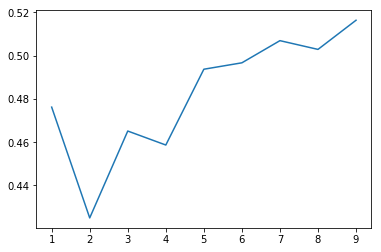

In [645]:
from sklearn.grid_search import GridSearchCV

knn = KNeighborsClassifier()
k_range = range(1, 10)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

# check the results of the grid search
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(k_range, grid_mean_scores)
plt.show()

It looks like the best option will be to use 9 for n_neighbors

In [646]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.516285329744
{'n_neighbors': 9}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')


In [647]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [648]:
print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))
#print metrics.roc_auc_score(y_test, knn.predict(X_test))

0.611659192825112
[[  0   5  21   0]
 [  0  64 259   0]
 [  0 103 618   0]
 [  0   0  45   0]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        26
          2       0.37      0.20      0.26       323
          3       0.66      0.86      0.74       721
          4       0.00      0.00      0.00        45

avg / total       0.53      0.61      0.56      1115



/Users/haileyrobinson/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


This method gives us a 61% accuracy which isn't very good. Let's try using the default of 5 for n_neighbors

In [649]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# initialize KNeighborsClassifier() and train a KNN Model
knn = KNeighborsClassifier(n_neighbors=5) #the default is 5, but if you leave three it improves the accuracy of our data

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [650]:
#Model evaluation with split valdation

print metrics.accuracy_score(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, knn.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
#print metrics.roc_auc_score(y_test, knn.predict(X_test))

0.6206278026905829
--------------------------------------------------------
[[  0   7  19   0]
 [  0  91 232   0]
 [  0 120 600   1]
 [  0   6  38   1]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        26
          2       0.41      0.28      0.33       323
          3       0.67      0.83      0.75       721
          4       0.50      0.02      0.04        45

avg / total       0.57      0.62      0.58      1115

--------------------------------------------------------


/Users/haileyrobinson/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Using n_neighbors = 5 actually gives us a higher accuracy than using 9 does, but 62% still isn't a very good accuracy. Let's move on to Logistic Regression.

### iii) Logistic Regression

In [651]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3715 entries, 0 to 5042
Data columns (total 22 columns):
num_critic_for_reviews       3715 non-null float64
duration                     3715 non-null float64
director_facebook_likes      3715 non-null float64
gross                        3715 non-null float64
num_voted_users              3715 non-null int64
cast_total_facebook_likes    3715 non-null int64
facenumber_in_poster         3715 non-null float64
num_user_for_reviews         3715 non-null float64
budget                       3715 non-null float64
title_year                   3715 non-null float64
movie_facebook_likes         3715 non-null int64
profit                       3715 non-null float64
roi                          3715 non-null float64
percentage_critical          3715 non-null float64
total_actor_likes            3715 non-null float64
aspect_ratio_groups          3715 non-null int64
content_rating_0.0           3715 non-null uint8
content_rating_1.0           3715 no

We have to drop content_rating_0.0 to avoid multicollinearity

In [652]:
y = df['imdb_score_category']
X = df.drop(['imdb_score_category', 'content_rating_0.0'], axis =1)

So now, this is what our x variable looks like

In [653]:
X.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes,aspect_ratio_groups,content_rating_1.0,content_rating_2.0,content_rating_3.0,content_rating_4.0
0,723.0,178.0,0.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,33000,523505847.0,220.888543,23.673870,2791.0,1,0,1,0,0
1,302.0,169.0,563.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,0,9404152.0,3.134717,24.394184,46000.0,5,0,1,0,0


In [654]:
# evaluate the model by splitting into train and test sets and build a logistic regression model
# name it as "lr"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [655]:
#Model evaluation

print metrics.accuracy_score(y_test, lr.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, lr.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, lr.predict(X_test))
print "--------------------------------------------------------"
#print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.6816143497757847
--------------------------------------------------------
[[  0   6  20   0]
 [  0  63 260   0]
 [  0  38 675   8]
 [  0   0  23  22]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        26
          2       0.59      0.20      0.29       323
          3       0.69      0.94      0.79       721
          4       0.73      0.49      0.59        45

avg / total       0.65      0.68      0.62      1115

--------------------------------------------------------


/Users/haileyrobinson/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


68% is great for accuracy, but still not as good as the decision tree model. Let's try Random Forest. 

### iv) Random Forest

In [656]:
from sklearn.ensemble import RandomForestClassifier

y = df['imdb_score_category']
X = df.drop(['imdb_score_category', 'content_rating_0.0'], axis =1)

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7632286995515695

In [657]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, clf.predict(X_test)) #overall accuracy
print metrics.confusion_matrix(y_test, clf.predict(X_test))
print metrics.classification_report(y_test, clf.predict(X_test))

0.7632286995515695
[[  3  11  12   0]
 [  0 164 159   0]
 [  0  55 666   0]
 [  0   0  27  18]]
             precision    recall  f1-score   support

          1       1.00      0.12      0.21        26
          2       0.71      0.51      0.59       323
          3       0.77      0.92      0.84       721
          4       1.00      0.40      0.57        45

avg / total       0.77      0.76      0.74      1115



Our highest classification accuracy of all our methods! Below, we can see the importance of each feature sorted from least important to most important. 

In [658]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), X.columns))

Features sorted by their rank:
[(0.0003, 'content_rating_4.0'), (0.0062, 'content_rating_1.0'), (0.0083, 'content_rating_2.0'), (0.0119, 'content_rating_3.0'), (0.0132, 'aspect_ratio_groups'), (0.0229, 'facenumber_in_poster'), (0.049, 'director_facebook_likes'), (0.0517, 'movie_facebook_likes'), (0.0538, 'total_actor_likes'), (0.0539, 'cast_total_facebook_likes'), (0.0555, 'roi'), (0.0561, 'percentage_critical'), (0.0589, 'title_year'), (0.062, 'profit'), (0.0657, 'num_user_for_reviews'), (0.0682, 'num_critic_for_reviews'), (0.0689, 'budget'), (0.0699, 'gross'), (0.0997, 'duration'), (0.124, 'num_voted_users')]


### v) Extra Tree Classifier

In [662]:
y = df['imdb_score_category']
X = df.drop(['imdb_score_category', 'content_rating_0.0'], axis =1)

model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)
print model_extra.score(X, y)

# display the relative importance of each attribute
print(model_extra.feature_importances_)

1.0
[0.07223085 0.08425432 0.05538681 0.05623201 0.12866994 0.04728059
 0.04580191 0.06209005 0.06477609 0.05770013 0.05720581 0.06297108
 0.05165589 0.05044479 0.05073538 0.02348881 0.00731032 0.01096627
 0.00985355 0.0009454 ]


In [663]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), model_extra.feature_importances_), X.columns))

Features sorted by their rank:
[(0.0009, 'content_rating_4.0'), (0.0073, 'content_rating_1.0'), (0.0099, 'content_rating_3.0'), (0.011, 'content_rating_2.0'), (0.0235, 'aspect_ratio_groups'), (0.0458, 'facenumber_in_poster'), (0.0473, 'cast_total_facebook_likes'), (0.0504, 'percentage_critical'), (0.0507, 'total_actor_likes'), (0.0517, 'roi'), (0.0554, 'director_facebook_likes'), (0.0562, 'gross'), (0.0572, 'movie_facebook_likes'), (0.0577, 'title_year'), (0.0621, 'num_user_for_reviews'), (0.063, 'profit'), (0.0648, 'budget'), (0.0722, 'num_critic_for_reviews'), (0.0843, 'duration'), (0.1287, 'num_voted_users')]


The Extra Tree Classifier gives us a very straight forward answer of how important each variable is. It is clear that Number of Voted Users, Duration, Number of Critical Reviews and Budget are important factors when determining if a movie is successful or not. 

# 8. Clustering

**We will analyze the data using K-means algorithm and Hierarchical clustering algorithm.**

According to our notes, in clustering the data is not labeled, it groups points that are close to each other and identifies structure or patterns in the data. It is a form of unsupervised learning. 

Here is what our data looks like before we normalize it

In [668]:
df.var()

num_critic_for_reviews       1.524057e+04
duration                     5.005902e+02
director_facebook_likes      9.505704e+06
gross                        4.983092e+15
num_voted_users              2.331076e+10
cast_total_facebook_likes    2.328521e+08
facenumber_in_poster         4.187300e+00
num_user_for_reviews         1.672665e+05
budget                       1.754287e+15
title_year                   9.785940e+01
movie_facebook_likes         4.618704e+08
profit                       2.762274e+15
roi                          1.119307e+06
percentage_critical          3.726473e+03
total_actor_likes            2.121947e+08
aspect_ratio_groups          1.300189e+00
content_rating_0.0           2.261959e-02
content_rating_1.0           1.286157e-01
content_rating_2.0           2.268899e-01
content_rating_3.0           2.490836e-01
content_rating_4.0           4.289470e-03
imdb_score_category          3.333278e-01
dtype: float64

#### Normalize Data

In [669]:
df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm.head()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes,aspect_ratio_groups,content_rating_0.0,content_rating_1.0,content_rating_2.0,content_rating_3.0,content_rating_4.0,imdb_score_category
0,0.685701,0.231648,-0.035332,0.930567,0.461750,-0.024499,-0.032051,0.537729,0.663200,0.067836,0.067824,0.816797,0.001135,-0.077541,-0.028692,-0.748721,-0.023149,-0.151548,0.652221,-0.468641,-0.004307,0.095200
1,0.166589,0.200932,-0.010854,0.337407,0.216150,0.140594,-0.032051,0.178552,0.873201,0.045364,-0.026732,-0.008605,-0.006334,-0.076505,0.136306,0.251279,-0.023149,-0.151548,0.652221,-0.468641,-0.004307,0.095200
2,0.536503,0.129259,-0.035332,0.193647,0.100535,0.001549,-0.008795,0.130292,0.689867,0.135252,0.216821,-0.095833,-0.007070,-0.024477,0.004770,0.251279,-0.023149,-0.151548,0.652221,-0.468641,-0.004307,0.095200
3,0.796676,0.183867,0.921190,0.519820,0.614521,0.362190,-0.032051,0.467911,0.706534,0.101544,0.443182,0.294400,-0.003723,-0.068297,0.239409,0.251279,-0.023149,-0.151548,0.652221,-0.468641,-0.004307,0.428533
6,0.277563,0.156563,-0.035332,0.373076,0.163972,0.131887,-0.032051,0.309881,0.733201,0.045364,-0.026732,0.102379,-0.005398,-0.081948,0.109576,0.251279,-0.023149,-0.151548,0.652221,-0.468641,-0.004307,0.095200


Now that we have normalized the data, we will look at the variance again to compare our data

In [670]:
df_norm.var()

num_critic_for_reviews       0.023172
duration                     0.005831
director_facebook_likes      0.017969
gross                        0.008616
num_voted_users              0.008165
cast_total_facebook_likes    0.003352
facenumber_in_poster         0.002265
num_user_for_reviews         0.006543
budget                       0.019492
title_year                   0.012354
movie_facebook_likes         0.003792
profit                       0.007120
roi                          0.001317
percentage_critical          0.007710
total_actor_likes            0.003094
aspect_ratio_groups          0.081262
content_rating_0.0           0.022620
content_rating_1.0           0.128616
content_rating_2.0           0.226890
content_rating_3.0           0.249084
content_rating_4.0           0.004289
imdb_score_category          0.037036
dtype: float64

## a) K-means clustering

#### Find Optimal K

Text(0.5,1,'Selecting k with the Elbow Method')

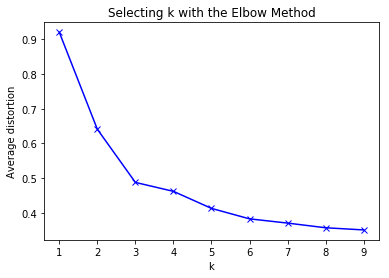

In [671]:
#The Elbow method

#https://www.packtpub.com/big-data-and-business-intelligence/mastering-machine-learning-scikit-learn#

#http://docs.scipy.org/doc/scipy/reference/spatial.distance.html
#Computes distance between each pair of the two collections of inputs
from scipy.spatial.distance import cdist 

K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(df_norm) 
    meandistortions.append(sum(np.min(cdist(df_norm, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df_norm.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

Based on the Elbow Method, we should use three clusters in our analysis. These clusters could represent bad, average and great movies. 

In [672]:
k_means = KMeans(init='k-means++', n_clusters=3, random_state=0)

In [673]:
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [674]:
k_means.labels_

array([1, 1, 1, ..., 1, 0, 2], dtype=int32)

In [675]:
k_means.cluster_centers_

array([[ 6.01929734e-04,  2.45396925e-03,  1.15011152e-03,
        -2.82904424e-02, -1.79207814e-03, -3.02571832e-03,
        -1.24814805e-03, -1.43188021e-03, -4.71415500e-02,
        -5.46540442e-03, -1.83103217e-03, -1.18369191e-02,
         8.76111577e-04,  4.32928555e-03, -2.36840612e-03,
        -9.20388106e-03, -2.31493943e-02, -1.51547779e-01,
        -3.47779273e-01,  5.31359354e-01, -4.30686406e-03,
         3.06773359e-02],
       [ 2.15403553e-02,  6.77798842e-03,  1.01375420e-03,
         2.15422952e-02,  7.96663946e-03,  6.75114585e-03,
         4.43462670e-03,  1.12226438e-02,  4.40436604e-02,
         2.73971312e-02,  7.26296207e-03,  5.08948627e-03,
        -3.57003573e-03, -7.73778243e-03,  5.89266192e-03,
         5.10077024e-02, -2.31493943e-02, -1.51547779e-01,
         6.52220727e-01, -4.68640646e-01, -4.30686406e-03,
        -3.32833310e-02],
       [-4.23432533e-02, -1.91048702e-02, -4.85647300e-03,
         3.14091128e-02, -1.05174342e-02, -5.06554962e-03,
    

In [343]:
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,1
1,1
2,1
3,1
4,1


Now we have created cluster as a column! We will join this column with the rest of our data

In [344]:
df_norm = df_norm.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

df2 = df.join(df1)
df2.head()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes,aspect_ratio_groups,content_rating_0.0,content_rating_1.0,content_rating_2.0,content_rating_3.0,content_rating_4.0,imdb_score_category,cluster
0,723.0,178.0,0.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,33000,523505847.0,220.888543,23.673870,2791.0,1,0,0,1,0,0,3,1.0
1,302.0,169.0,563.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,0,9404152.0,3.134717,24.394184,46000.0,5,0,0,1,0,0,3,1.0
2,602.0,148.0,0.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,85000,-44925825.0,-18.337071,60.563380,11554.0,5,0,0,1,0,0,3,1.0
3,813.0,164.0,22000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,164000,198130642.0,79.252257,30.099963,73000.0,5,0,0,1,0,0,4,1.0
6,392.0,156.0,0.0,336530303.0,383056,46055,0.0,1902.0,258000000.0,2007.0,0,78530303.0,30.438102,20.609884,39000.0,5,0,0,1,0,0,3,1.0


The very last column is the movie's cluster. We will look into further details about the clusters. 

#### How many observations are there in the clusters?

In [176]:
df2.groupby(['cluster']).count()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes,aspect_ratio_groups,content_rating_0.0,content_rating_1.0,content_rating_2.0,content_rating_3.0,content_rating_4.0,imdb_score_category
cluster,,,,,,,,,,,,,,,,,,,,,,
0,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741
1,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292
2,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682


There are: 
- 1741 in cluster 0
- 1292 in cluster 1
- 682 in cluster 2

#### The mean values of each cluster in terms of different variables

In [345]:
df2.groupby('cluster')['num_voted_users'].mean()

cluster
0.0    92893.230716 
1.0    137338.737544
2.0    127904.215017
Name: num_voted_users, dtype: float64

**Visualization:**

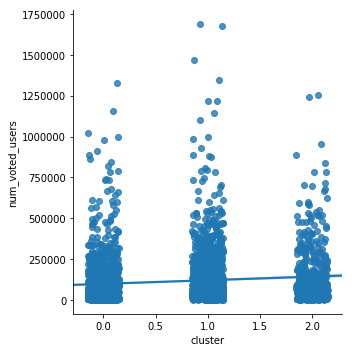

In [352]:
sns.lmplot("cluster", "num_voted_users", df2, x_jitter=.15, y_jitter=.15)

In [346]:
df2.groupby('cluster')['duration'].mean()

cluster
0.0    110.437109
1.0    113.899466
2.0    111.172355
Name: duration, dtype: float64

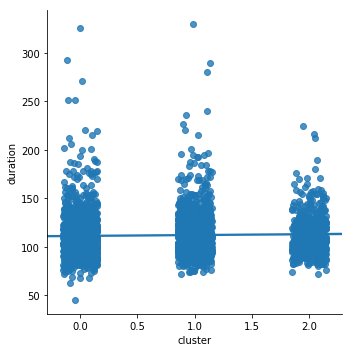

In [353]:
sns.lmplot("cluster", "duration", df2, x_jitter=.15, y_jitter=.15)

In [348]:
df2.groupby('cluster')['num_critic_for_reviews'].mean()

cluster
0.0    153.699792
1.0    192.113879
2.0    187.851536
Name: num_critic_for_reviews, dtype: float64

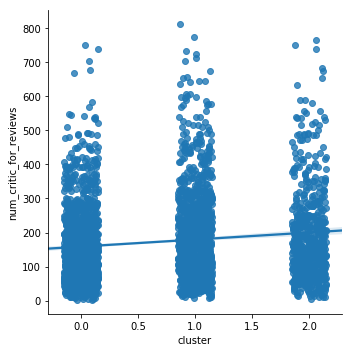

In [354]:
sns.lmplot("cluster", "num_critic_for_reviews", df2, x_jitter=.15, y_jitter=.15)

In [350]:
df2.groupby('cluster')['budget'].mean()

cluster
0.0    3.059360e+07
1.0    5.543110e+07
2.0    5.367553e+07
Name: budget, dtype: float64

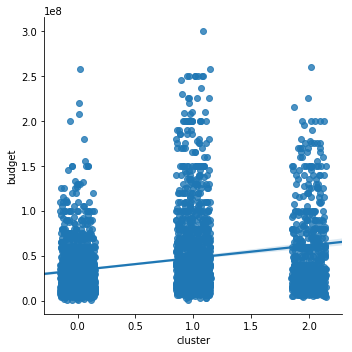

In [355]:
sns.lmplot("cluster", "budget", df2, x_jitter=.15, y_jitter=.15)

In [351]:
df2.groupby('cluster')['imdb_score_category'].mean()

cluster
0.0    2.675469
1.0    2.718861
2.0    2.721843
Name: imdb_score_category, dtype: float64

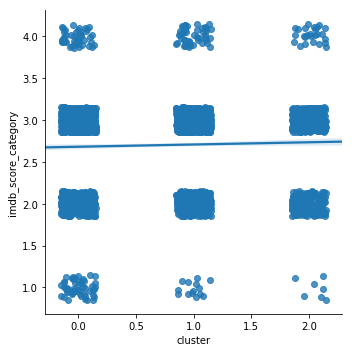

In [356]:
sns.lmplot("cluster", "imdb_score_category", df2, x_jitter=.15, y_jitter=.15)

This is surprising to me, they all have about the same imdb score category, but you can tell from the visualization that cluster 2 has the lowest number of imdb_score_category = 1 or bad movies. 

#### Based on the analysis of each cluster: 
    
- Cluster 0: has the lowest number of voted users, the shortest duration, the lowest number of critical reviews, and the lowest budget. I would assume this is the "bad" movies in this cluster. 

- Cluster 1: has the highest number of voted users, the longest duration, the highest number of ciritcal reviews and the highest budget. However, it has a slightly lower score for imdb_score_category, so these might be the "average" movies. 

- Cluster 2: has the median number for all variables, except for imdb_score_category. This could mean that these are the great movies and ones with the highest success rate. 

#### Profile

In [357]:
df2.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes,aspect_ratio_groups,content_rating_0.0,content_rating_1.0,content_rating_2.0,content_rating_3.0,content_rating_4.0,imdb_score_category
cluster,,,,,,,,,,,,,,,,,,,,,,
0.0,153.699792,110.437109,807.373871,4.503900e+07,92893.230716,10551.833218,1.439194,305.909659,3.059360e+07,2002.428075,7003.361362,1.444540e+07,114.975951,75.128884,9587.198749,4.003475,0.023628,0.149409,0.355108,0.466991,0.002085,2.675469
1.0,192.113879,113.899466,948.656584,7.442601e+07,137338.737544,13732.681495,1.444840,419.341637,5.543110e+07,2004.213523,12299.161922,1.899491e+07,73.890286,72.871687,12548.104093,4.183274,0.025801,0.173488,0.412811,0.383452,0.002669,2.718861
2.0,187.851536,111.172355,983.317406,6.703733e+07,127904.215017,13555.716724,1.353242,357.459044,5.367553e+07,2004.662116,13040.064846,1.336180e+07,60.509104,75.799369,12430.032423,4.218430,0.030717,0.187713,0.395904,0.382253,0.001706,2.721843


Here we can see which categories aren't as important when determining movie success. If the means are close together, the variabel isn't as important as others that have a larger difference in their mean values. For example, title year, percentage_critical, and aspect_ratio_groups are not very important in analyzing our data. 

### Randomforestclassifier model for feature importance 

In [676]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)  
clf=clf.fit(X, y)
clf.score(X,y)

0.9983849259757739

In [677]:
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_}).\
                                                    sort_values('importance',ascending=False)

,feature,importance
4,num_voted_users,0.135908
1,duration,0.093356
0,num_critic_for_reviews,0.074164
3,gross,0.073868
7,num_user_for_reviews,0.071782
8,budget,0.066282
9,title_year,0.059163
11,profit,0.057144
13,percentage_critical,0.056322
5,cast_total_facebook_likes,0.053564


As we have seen in previous models, num_voted_users and duration are two very important features when determining imdb score. 

## b) Agglomerative Clustering (Hierarchical)

In [678]:
np.random.seed(1)

agg= AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
agg.labels_

array([1, 1, 0, ..., 2, 2, 2])

In [679]:
df3 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df3.head()

,cluster
0,1
1,1
2,0
3,1
4,1


In [680]:
df4 = X.join(df3)
df4.head()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes,aspect_ratio_groups,content_rating_1.0,content_rating_2.0,content_rating_3.0,content_rating_4.0,cluster
0,723.0,178.0,0.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,33000,523505847.0,220.888543,23.673870,2791.0,1,0,1,0,0,1.0
1,302.0,169.0,563.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,0,9404152.0,3.134717,24.394184,46000.0,5,0,1,0,0,1.0
2,602.0,148.0,0.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,85000,-44925825.0,-18.337071,60.563380,11554.0,5,0,1,0,0,0.0
3,813.0,164.0,22000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,164000,198130642.0,79.252257,30.099963,73000.0,5,0,1,0,0,1.0
6,392.0,156.0,0.0,336530303.0,383056,46055,0.0,1902.0,258000000.0,2007.0,0,78530303.0,30.438102,20.609884,39000.0,5,0,1,0,0,1.0


### Visualize Dendrogram

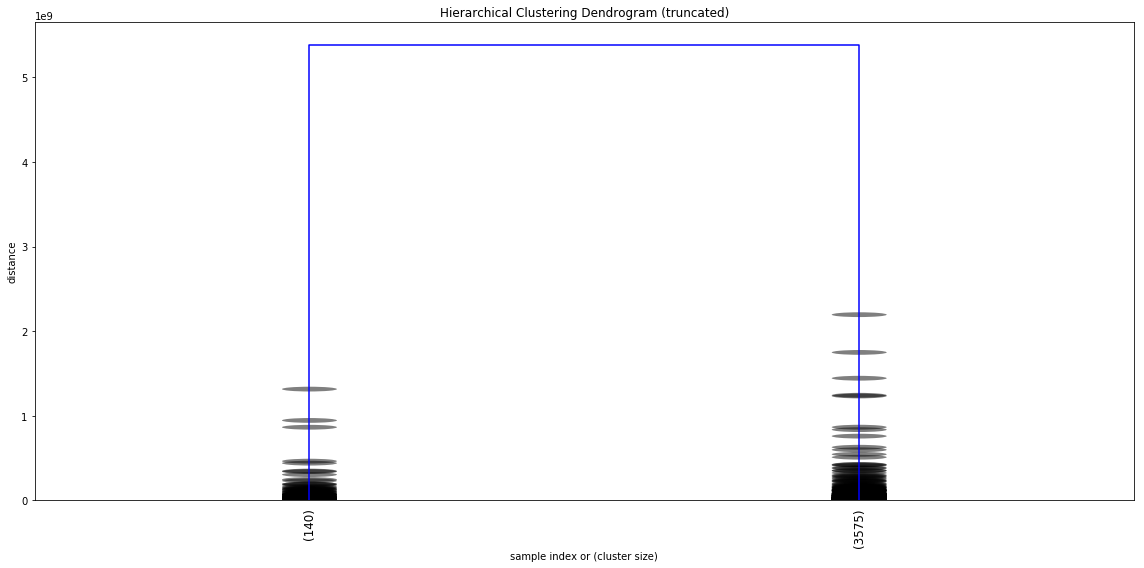

In [681]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=2,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

#### How many observations are in the clusters? 

In [682]:
df4.groupby(['cluster']).count()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes,aspect_ratio_groups,content_rating_1.0,content_rating_2.0,content_rating_3.0,content_rating_4.0
cluster,,,,,,,,,,,,,,,,,,,,
0.0,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724
1.0,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123
2.0,2302,2302,2302,2302,2302,2302,2302,2302,2302,2302,2302,2302,2302,2302,2302,2302,2302,2302,2302,2302


There are: 
- 724 in cluster 0
- 123 in cluster 1
- 2302 in cluster 2


This is shocking, there are many more movies in cluster 2 than cluster 0 or cluster 1

#### The mean values of each cluster in terms of different variables 

In [683]:
df4.groupby('cluster')['num_voted_users'].mean()

cluster
0.0    154824.421271
1.0    273126.382114
2.0    94399.019983 
Name: num_voted_users, dtype: float64

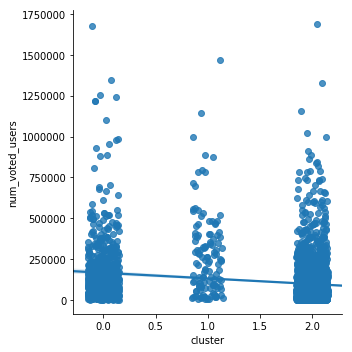

In [684]:
sns.lmplot("cluster", "num_voted_users", df4, x_jitter=.15, y_jitter=.15)

In [685]:
df4.groupby('cluster')['budget'].mean()

cluster
0.0    7.697624e+07
1.0    1.233748e+08
2.0    2.905157e+07
Name: budget, dtype: float64

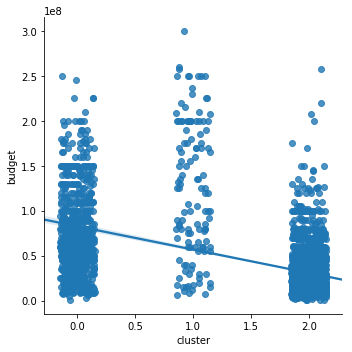

In [686]:
sns.lmplot("cluster", "budget", df4, x_jitter=.15, y_jitter=.15)

## Profile

In [687]:
df4.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes,aspect_ratio_groups,content_rating_1.0,content_rating_2.0,content_rating_3.0,content_rating_4.0
cluster,,,,,,,,,,,,,,,,,,,,
0.0,209.109116,116.203039,1158.309392,8.836723e+07,154824.421271,14806.830110,1.234807,481.546961,7.697624e+07,2004.948895,13620.455801,1.139098e+07,44.553335,68.570286,13608.037293,4.287293,0.193370,0.454420,0.323204,0.001381
1.0,307.081301,124.341463,1534.796748,1.640397e+08,273126.382114,23314.162602,1.365854,739.983740,1.233748e+08,2006.691057,29405.674797,4.066489e+07,36.384605,60.784614,20951.463415,4.276423,0.195122,0.577236,0.170732,0.000000
2.0,155.527802,109.758471,771.906603,4.500221e+07,94399.019983,10849.472198,1.488271,295.984796,2.905157e+07,2002.847958,7847.725891,1.595064e+07,107.397693,77.026619,9884.794961,4.042137,0.154648,0.350565,0.465682,0.002606


- Cluster 0 has the median number of voted users, the median duration, the median number of critical reviews, and the highest budget
- Cluster 1 has the highest number of voted users, longest duration, highest number of critical reviews and the lowest budget 
- Cluster 2 has the lowest number of voted users, the lowest duration, the lowest number of critical reviews and the median budget

I would assume that Cluster 0 are the Okay movies, cluster 1 is the excellent movies, and cluster 2 is the bad movies. 

Just as with the K-Means clustering model, we can see which categories aren't as important when determining movie success. If the means are close together, the variabel isn't as important as others that have a larger difference in their mean values. Facenumber_in_poster, percentage_critical, aspect_ratio_groups, and the content ratings are not very important features. 

## c) Compare the results from K-Mean clustering and Agglomerative clustering analysis by looking at their profiles

In [377]:
df2.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes,aspect_ratio_groups,content_rating_0.0,content_rating_1.0,content_rating_2.0,content_rating_3.0,content_rating_4.0,imdb_score_category
cluster,,,,,,,,,,,,,,,,,,,,,,
0.0,153.699792,110.437109,807.373871,4.503900e+07,92893.230716,10551.833218,1.439194,305.909659,3.059360e+07,2002.428075,7003.361362,1.444540e+07,114.975951,75.128884,9587.198749,4.003475,0.023628,0.149409,0.355108,0.466991,0.002085,2.675469
1.0,192.113879,113.899466,948.656584,7.442601e+07,137338.737544,13732.681495,1.444840,419.341637,5.543110e+07,2004.213523,12299.161922,1.899491e+07,73.890286,72.871687,12548.104093,4.183274,0.025801,0.173488,0.412811,0.383452,0.002669,2.718861
2.0,187.851536,111.172355,983.317406,6.703733e+07,127904.215017,13555.716724,1.353242,357.459044,5.367553e+07,2004.662116,13040.064846,1.336180e+07,60.509104,75.799369,12430.032423,4.218430,0.030717,0.187713,0.395904,0.382253,0.001706,2.721843


In [378]:
df4.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,movie_facebook_likes,profit,roi,percentage_critical,total_actor_likes,aspect_ratio_groups,content_rating_1.0,content_rating_2.0,content_rating_3.0,content_rating_4.0
cluster,,,,,,,,,,,,,,,,,,,,
0.0,209.109116,116.203039,1158.309392,8.836723e+07,154824.421271,14806.830110,1.234807,481.546961,7.697624e+07,2004.948895,13620.455801,1.139098e+07,44.553335,68.570286,13608.037293,4.287293,0.193370,0.454420,0.323204,0.001381
1.0,307.081301,124.341463,1534.796748,1.640397e+08,273126.382114,23314.162602,1.365854,739.983740,1.233748e+08,2006.691057,29405.674797,4.066489e+07,36.384605,60.784614,20951.463415,4.276423,0.195122,0.577236,0.170732,0.000000
2.0,155.527802,109.758471,771.906603,4.500221e+07,94399.019983,10849.472198,1.488271,295.984796,2.905157e+07,2002.847958,7847.725891,1.595064e+07,107.397693,77.026619,9884.794961,4.042137,0.154648,0.350565,0.465682,0.002606


These two clustering models are surprisingly different in the number of movies in each cluster and the means in each cluster. However, they both show very little difference in means for variables that are not important, and a large difference in means for highly important variables. 

# Storytelling

## Most important variables to determine imdb_score and movie success

-	Number of voted users
-	Duration
-	Number of critical reviews
-	Budget
-	Profit


## Recommendations for movie producers, investors, and viewers

My recommendations are very similar to when we completed the midterm project. Based on the variables above, here are my recommendations: 

1. Ask fans on Social Media (director, movie, and cast) to review the movie on imdb. Assuming that fans are the ones who follow the director and cast on social media, hopefully these would be good reviews. Based on our analysis, the more reviews you have, the more successful the movie is. If the movie has a high score on imdb, more people are likely to watch the movie. And to the viewers - review the movie if you really love it! 

2. Produce a longer movie. It seems odd to me, but movies with a longer duration seem to have better success. If the movie is great, fans want to see more of it! 

3. Critical reviews come along with asking people to review your movie. There are going to be some critical reviews for every movie, and if you have a large number of reviews, you are also going to have a large number of critical reviews. One of our variables is the percentage of critical reviews. This isn't an important variable which means that you don't need a large number of critical reviews to be successful, you just need reviews in general. 

4. Try your best to get a large budget. This analysis is something that you could show to investors, proving that if there is a larger budget, the movie is more popular and therefore has a higher profit and return on investment for them. A larger budget helps get better producers, more popular actors/actresses which draws in more viewers. 

5. Promotion. Be sure you are promoting the movie to the right crowds, or produce a movie that would be popular for all ages. The more viewers you have, the more reviews you could get, and the larger your profit will be! 

## Additional Variables to improve analysis

I think it would be interesting to have data on how much was spent on the marketing for the movie. There could be a large correlation between the amount of marketing that was spent on the movie and the success. From market research before the movie is produced to promotion for the movie, there could be an interesting relationship between these variables. 

## Final Notes

There are many different ways that this analysis could be done, and this is just one way of looking at it. Pandas has so many different types of regressions, classifications and clustering, this is just a preview of the options that exist. 

Sources: 
 * https://phys.org/news/2017-11-explores-movie-successful.html
 * https://www.kaggle.com/carolzhangdc/predict-imdb-score-with-data-mining-algorithms 
 * http://rstudio-pubs-static.s3.amazonaws.com/342210_7c8d57cfdd784cf58dc077d3eb7a2ca3.html
    